In [11]:
# library(SingleCellExperiment)
# library(scran)
# library(scater)

In [53]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/covid/full_counts_sce.Rds"

In [54]:
sce_all = readRDS(filename)
sce = sce_all

In [55]:
# make sure to remove pre-existing size factors, previously computed log counts
assay(sce, "logcounts") <- NULL
sizeFactors(sce) <- NULL

In [56]:
##### Note this step is hard-coded
# partial and full datasets might not and often will not be subsamples of a single sce object

In [57]:
table(sce$dataset)


   Groningen_Nawijn_2019VieiraBraga   Northwestern_Misharin_2018Reyfman 
                              11110                               41778 
         Sanger_Meyer_2019Madissoon Vanderbilt_Kropski_bioRxivHabermann 
                              56711                               31644 

In [58]:
datasets = unique(sce$dataset)
datasets = datasets[order(datasets)]
datasets

[1] "Groningen_Nawijn_2019VieiraBraga"    "Northwestern_Misharin_2018Reyfman"  
[3] "Sanger_Meyer_2019Madissoon"          "Vanderbilt_Kropski_bioRxivHabermann"

In [59]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/covid/variance_dfs/"
full_dir = paste0(mydir,"full_datasets_folder/")

In [60]:
select_genes <- function(dec,n){
    dec = dec[order(dec$mean),]
    m = min(dec$mean)
    M = max(dec$mean)
    genes = c()
    for (i in seq(m,M,length.out=n)){
        genes = c(genes,names(head(dec$mean[dec$mean>i],1)))
    }
    genes
}

In [61]:
for (dataset in datasets[2:4]){
    ds1 = dataset
    print(ds1)
    for (dataset in datasets){
        ds2 = dataset
        print(ds2)
        if (ds1 == ds2){next}
        sce1 = sce_all[,sce_all$dataset == ds1]
        sce2 = sce_all[,sce_all$dataset == ds2]
        sce_all1 = sce1
        sce_all2 = sce2
        celltypes1 = as.character(unique(sce1$ann_level_3))
        celltypes2 = as.character(unique(sce2$ann_level_3))
        celltypes = celltypes1[celltypes1 %in% celltypes2]
        celltypes = celltypes[!(is.na(celltypes))]
        for (celltype in celltypes){
            print(celltype)
            sce1 = sce_all1[,sce_all1$ann_level_3 == celltype]
            sce2 = sce_all2[,sce_all2$ann_level_3 == celltype]
            if (ncol(sce1) ==1 | ncol(sce2) ==1){break}
            ## sce1
            sce = sce1
            # use edgeR to compute (log2) CPM
            logcounts(sce) = edgeR::cpm(counts(sce), log = TRUE, prior.count = 0.1)
            # compute mean variance trend (for sce1)
            dec1 <- scran::modelGeneVar(sce)
            sce1 = sce
            ## sce1
            sce = sce2
            # use edgeR to compute (log2) CPM
            logcounts(sce) = edgeR::cpm(counts(sce), log = TRUE, prior.count = 0.1)
            # compute mean variance trend (for sce2, before subsetting to only few genes)
            dec2 <- scran::modelGeneVar(sce)
            # select (10 genes) at intervals along the mean
            selected_genes = select_genes(dec2, n=11)
            ## now actually make sce2 partial
            # after saving total counts
            sce$total_counts = colSums(counts(sce))
            # select down on only present genes
            sce = sce[selected_genes,]
            assay(sce, "logcounts") <- NULL
            # re normalise (using total counts)
            logcounts(sce) = edgeR::cpm(counts(sce), log = TRUE, lib.size = sce$total_counts, prior.count = 0.1)
            sce2 = sce
            # make df to save
            df = data.frame(mean = rowMeans(logcounts(sce2)), 
                        sampled_variance = rowVars(logcounts(sce2)),
                       est_from_full_variance = metadata(dec1)$trend(rowMeans(logcounts(sce2))),
                       est_from_partial_variance_when_present = metadata(dec2)$trend(rowMeans(logcounts(sce2))))
            df$n_cells_dataset1 = ncol(sce1)
            df$n_cells_dataset2 = ncol(sce2)
            celltype = gsub("/","_",celltype)
            celltype = gsub(" ","_",celltype)
            filename = paste0(full_dir,"celltype_",celltype,".full_dataset_",ds1,".partial_dataset_",ds2,".csv")
#             print(filename)
            write.csv(df, filename)
    
}
    }
}

[1] "Northwestern_Misharin_2018Reyfman"
[1] "Groningen_Nawijn_2019VieiraBraga"
[1] "Macrophages"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Ciliated lineage"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Secretory"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Monocytes"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Dendritic cells"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Mast cells"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Northwestern_Misharin_2018Reyfman"
[1] "Sanger_Meyer_2019Madissoon"
[1] "AT2"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Macrophages"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Ciliated lineage"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "AT1"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Monocytes"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Dendritic cells"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Mast cells"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "2_Blood vessels"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Capillary Intermediate 2"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Vanderbilt_Kropski_bioRxivHabermann"
[1] "AT2"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Macrophages"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Ciliated lineage"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Secretory"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "AT1"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Monocytes"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Dendritic cells"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Mast cells"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "2_Blood vessels"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Capillary Intermediate 2"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "KRT5-/KRT17+"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Sanger_Meyer_2019Madissoon"
[1] "Groningen_Nawijn_2019VieiraBraga"
[1] "B cell lineage"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "T cell lineage"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Monocytes"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Mast cells"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Macrophages"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Fibroblasts"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Dendritic cells"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Airway smooth muscle"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Ciliated lineage"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Northwestern_Misharin_2018Reyfman"
[1] "Monocytes"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Mast cells"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Macrophages"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "AT2"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "2_Blood vessels"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Dendritic cells"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "AT1"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Ciliated lineage"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Capillary Intermediate 2"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Sanger_Meyer_2019Madissoon"
[1] "Vanderbilt_Kropski_bioRxivHabermann"
[1] "B cell lineage"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "T cell lineage"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Monocytes"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Innate lymphoid cells"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Mast cells"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Macrophages"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Fibroblasts"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "AT2"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "2_Blood vessels"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Dendritic cells"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "AT1"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Ciliated lineage"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Capillary Intermediate 2"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Vanderbilt_Kropski_bioRxivHabermann"
[1] "Groningen_Nawijn_2019VieiraBraga"
[1] "T cell lineage"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Macrophages"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Monocytes"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Ciliated lineage"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Fibroblasts"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Secretory"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "B cell lineage"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Mast cells"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Dendritic cells"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Basal"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Northwestern_Misharin_2018Reyfman"
[1] "Macrophages"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Monocytes"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "AT2"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Capillary Intermediate 2"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "AT1"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Ciliated lineage"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Secretory"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "2_Blood vessels"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Mast cells"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Dendritic cells"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "KRT5-/KRT17+"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Sanger_Meyer_2019Madissoon"
[1] "Innate lymphoid cells"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "T cell lineage"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Macrophages"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Monocytes"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "AT2"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Capillary Intermediate 2"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "AT1"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Ciliated lineage"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Fibroblasts"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "B cell lineage"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "2_Blood vessels"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Mast cells"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Dendritic cells"


Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

[1] "Vanderbilt_Kropski_bioRxivHabermann"


In [62]:
myfiles = list.files(full_dir)
length(myfiles)

[1] 116

In [63]:
make_plotting_df <- function(df){
    df0 = df[,c("mean","sampled_variance")]
    colnames(df0) <- c("mean","variance")
    df0$type = 'sample_variance_sample2'
    df1 = df[,c("mean","est_from_full_variance")]
    colnames(df1) <- c("mean","variance")
    df1$type = 'var_estimated_from_mean_var_trend_from_sample1'
    df2 = df[,c("mean","est_from_partial_variance_when_present")]
    colnames(df2) <- c("mean","variance")
    df2$type = 'var_estimated_from_mean_var_trend_from_sample2'
    rbind(df0,df1,df2)
}

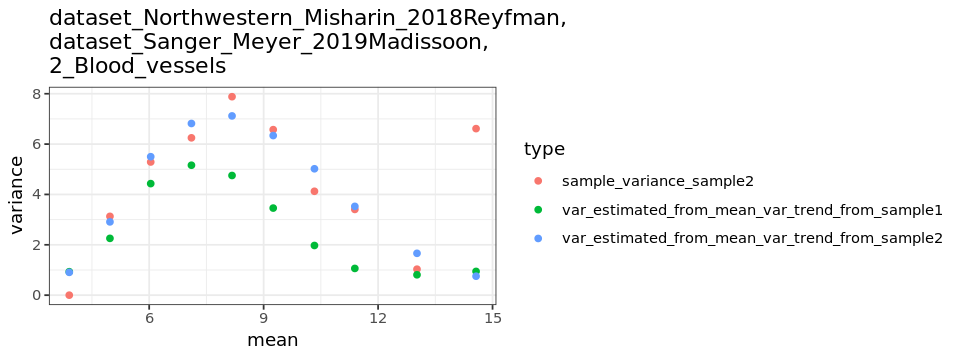

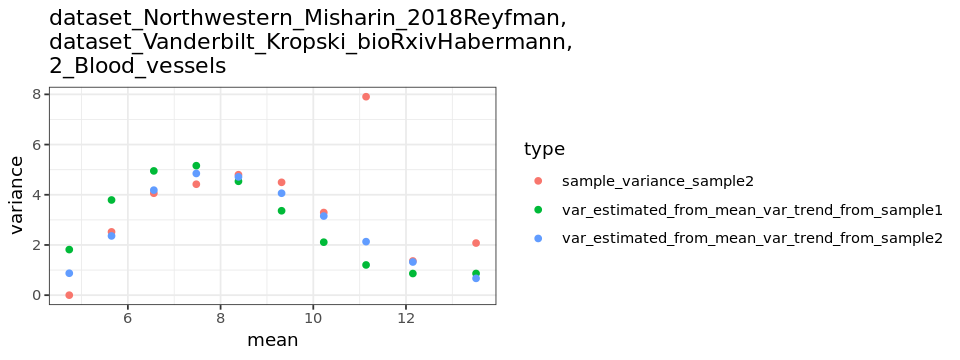

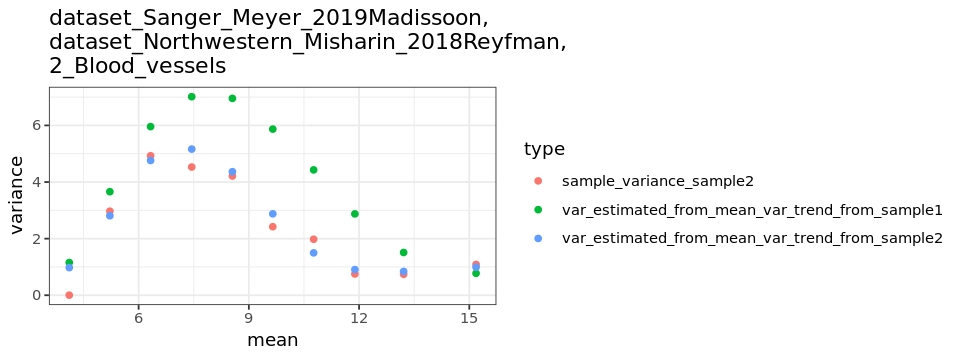

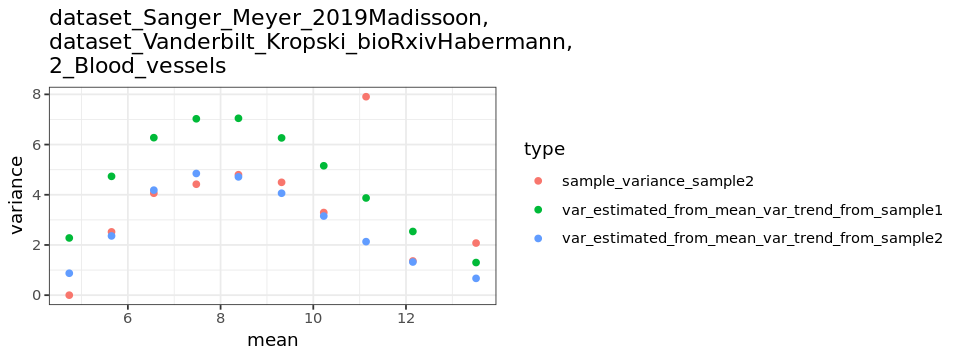

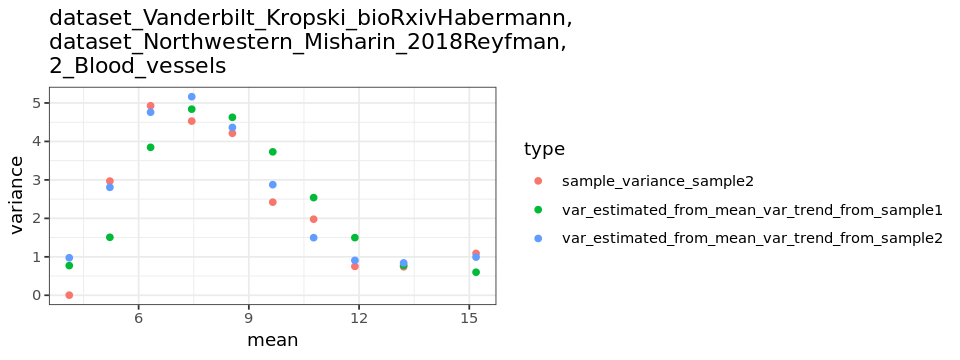

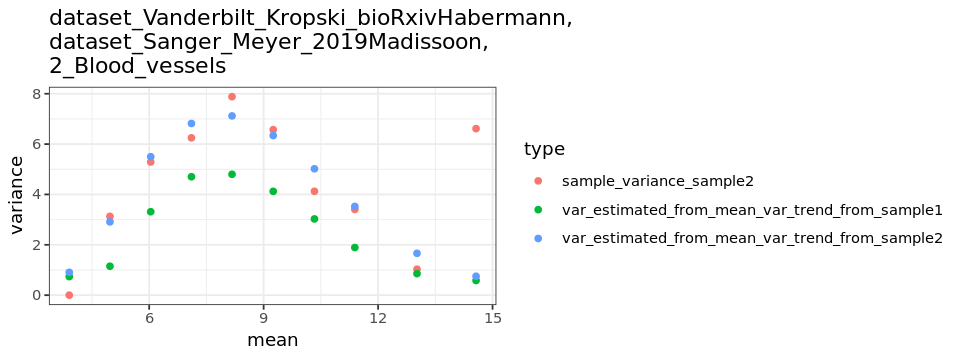

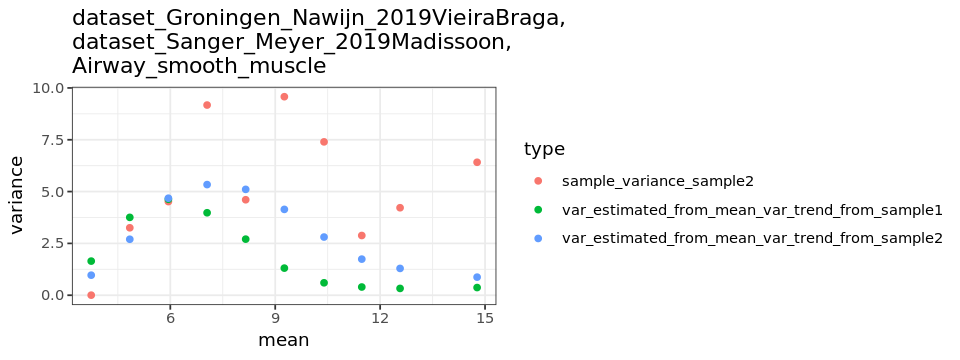

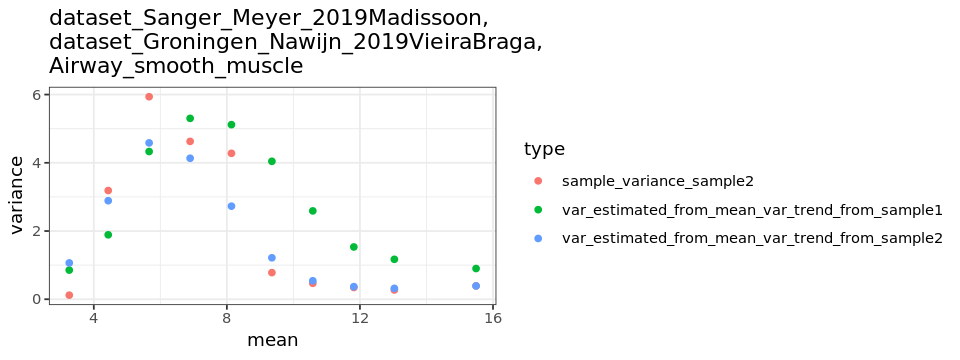

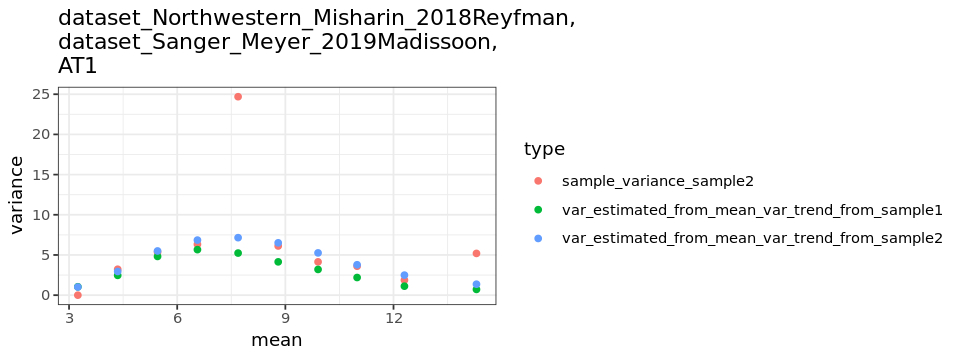

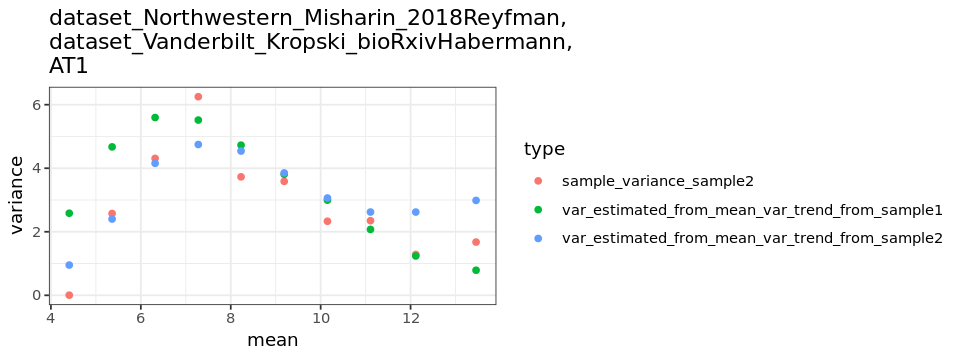

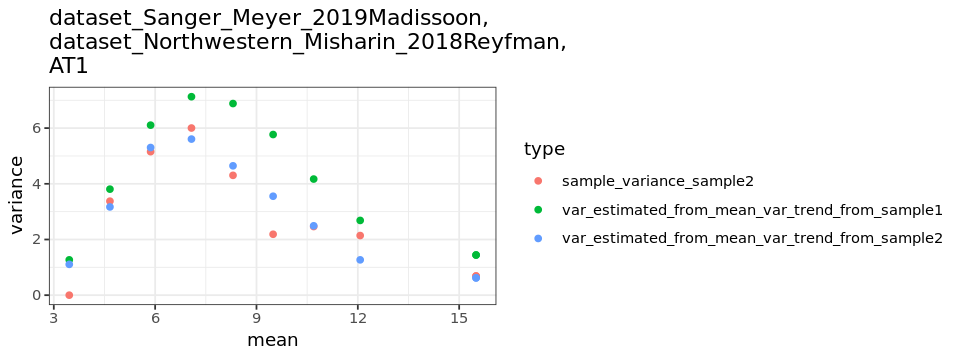

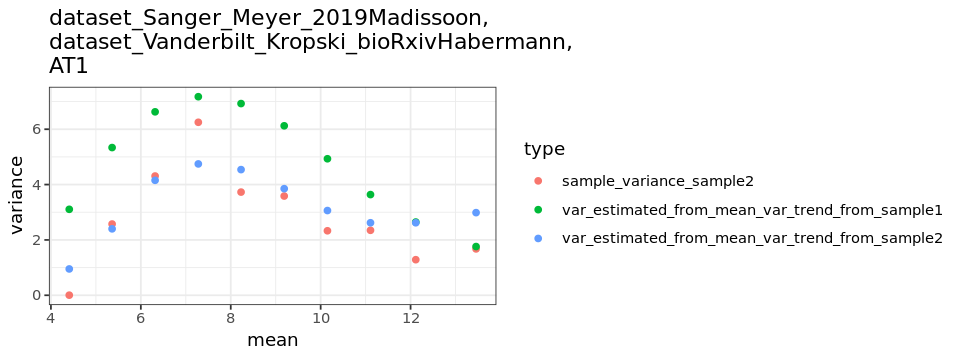

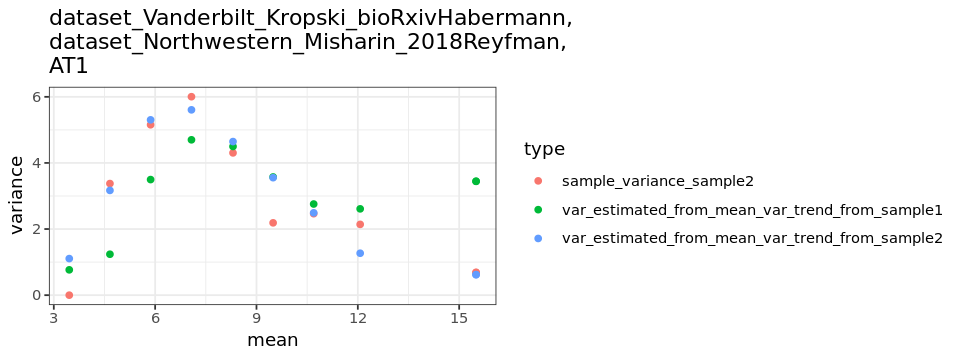

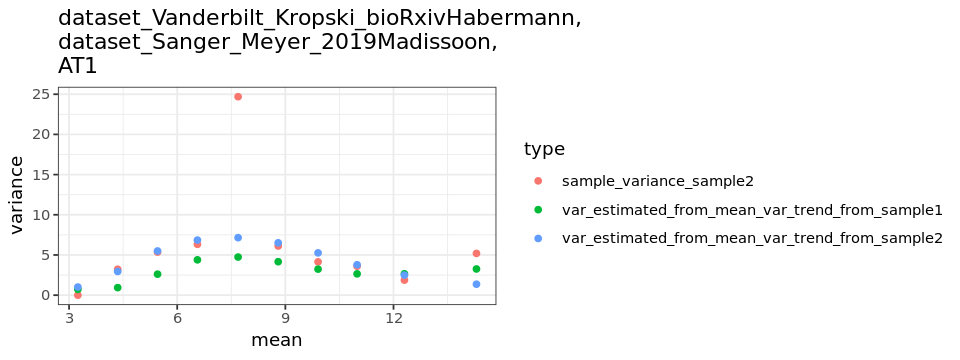

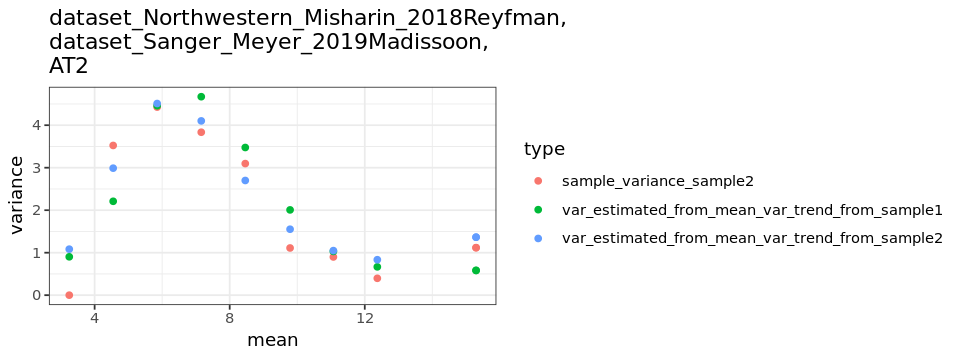

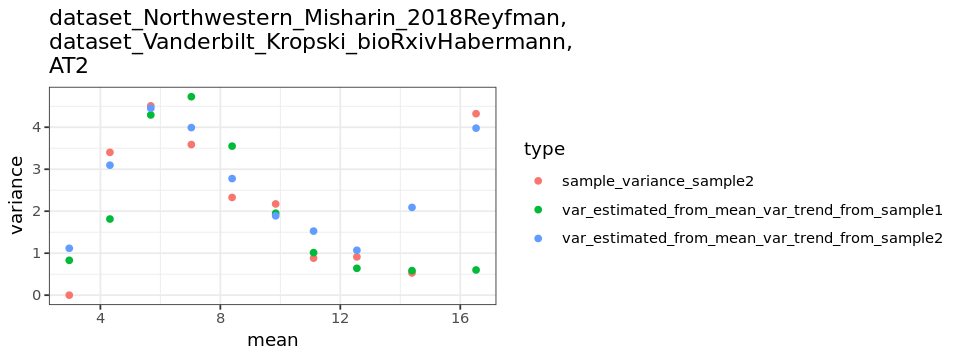

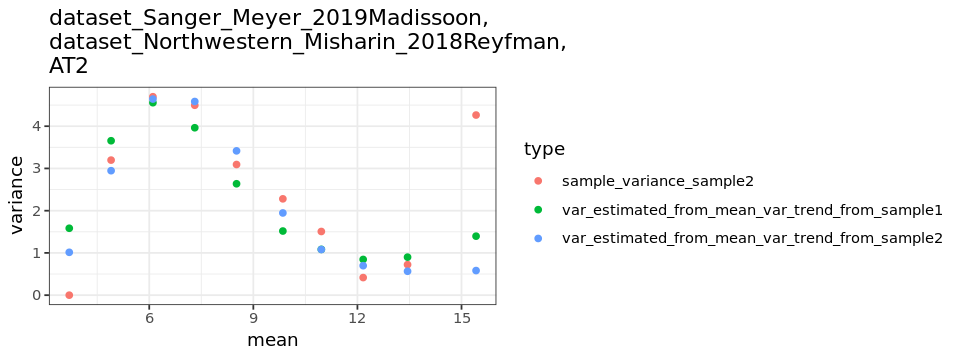

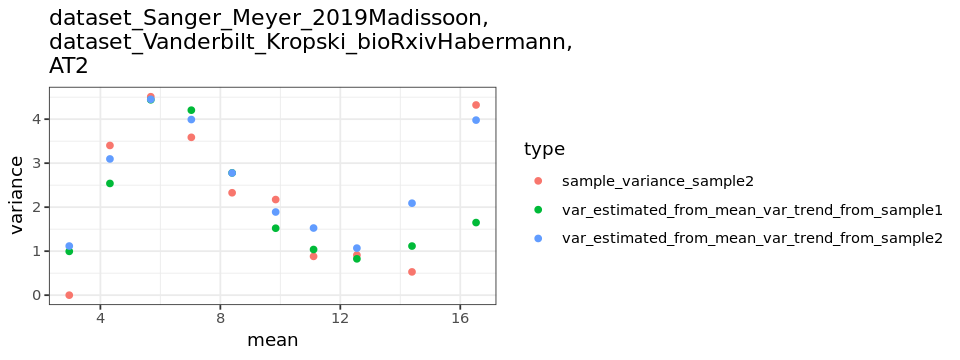

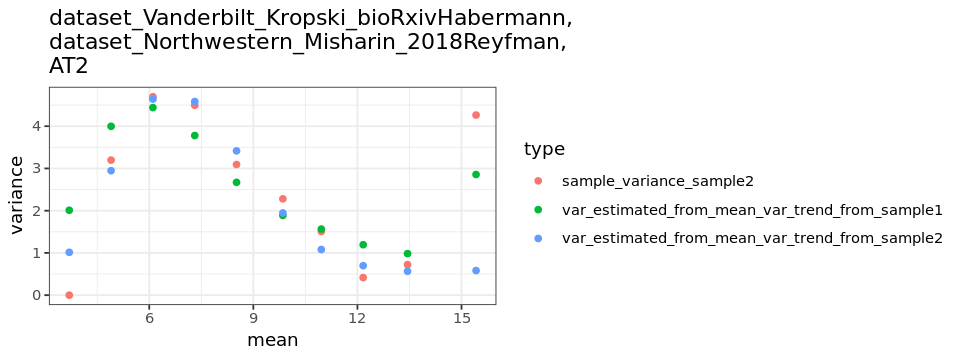

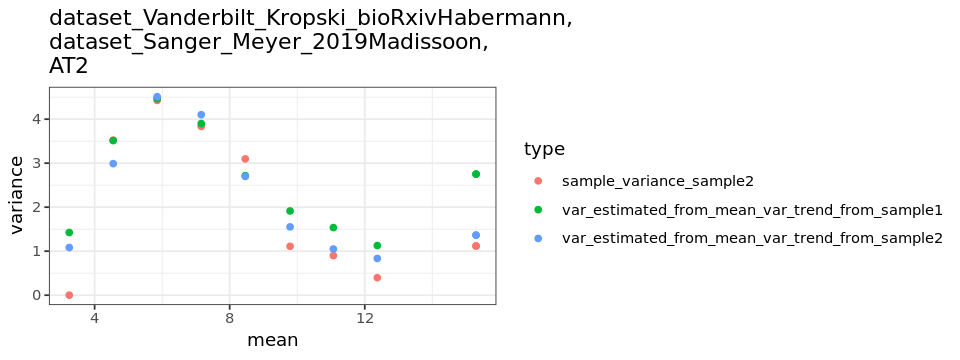

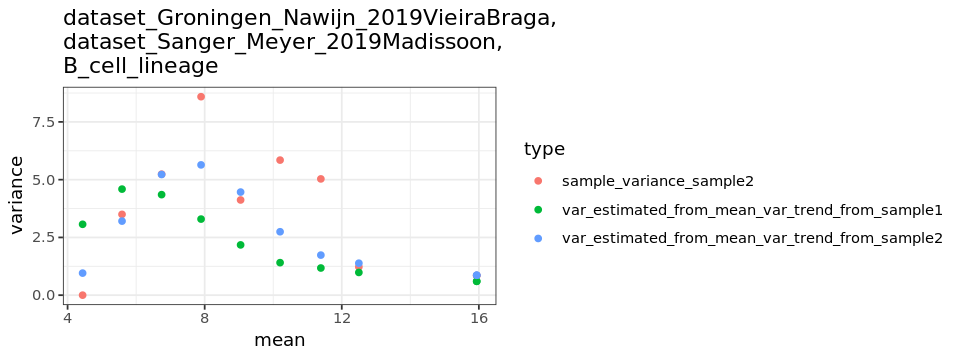

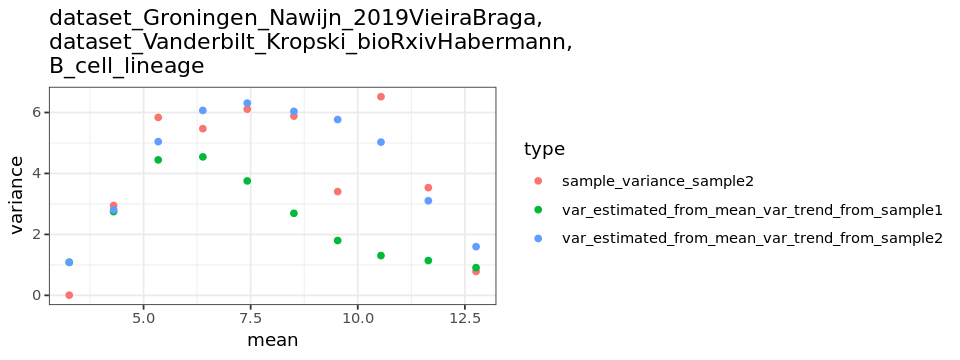

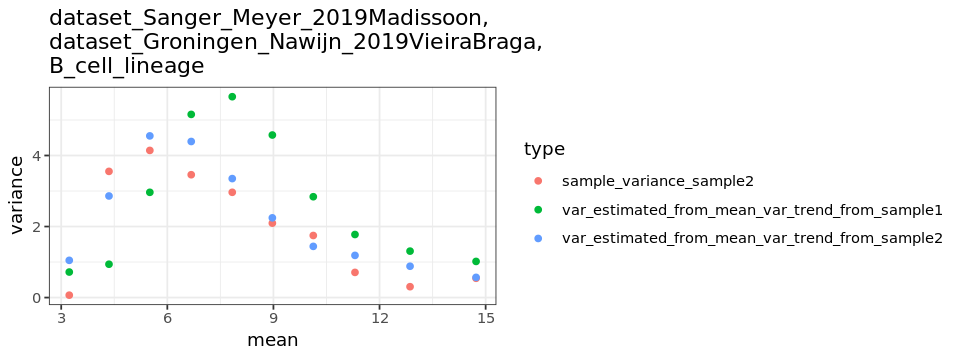

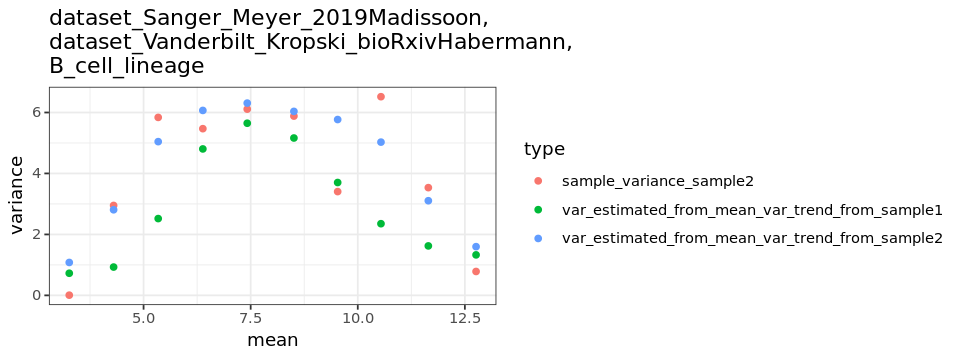

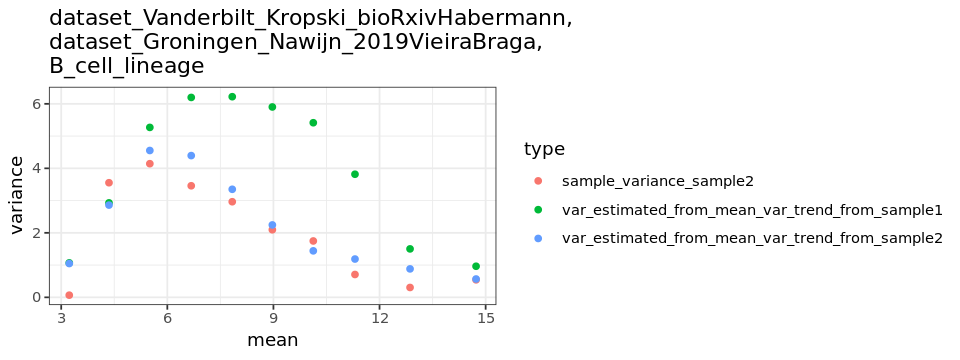

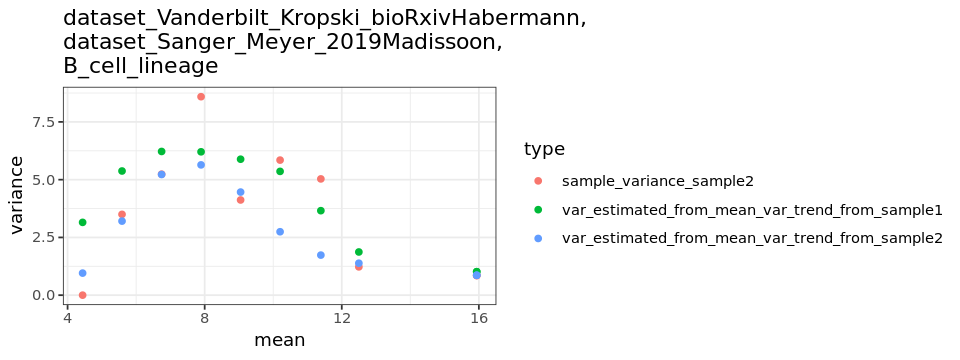

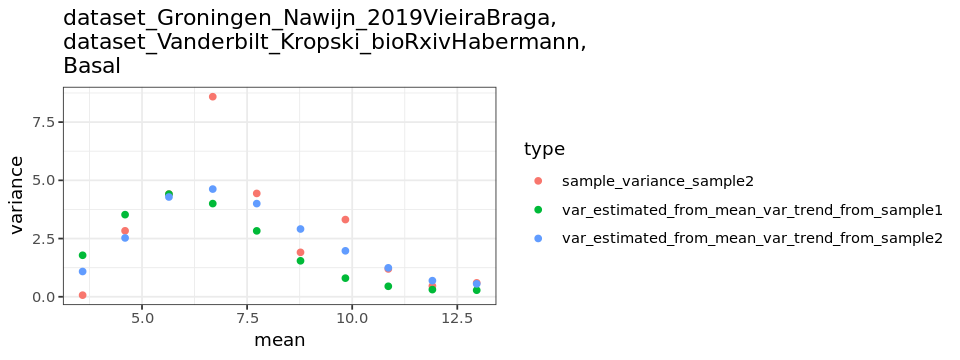

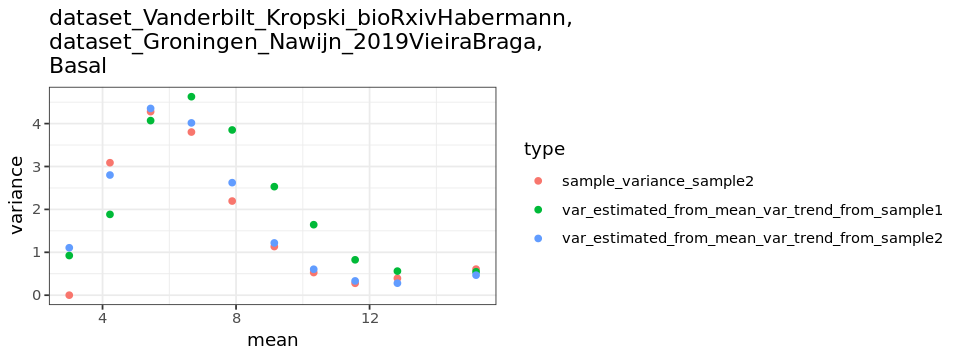

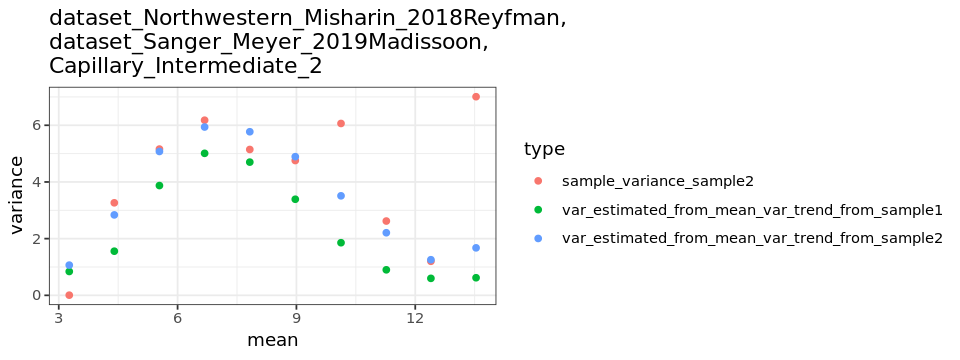

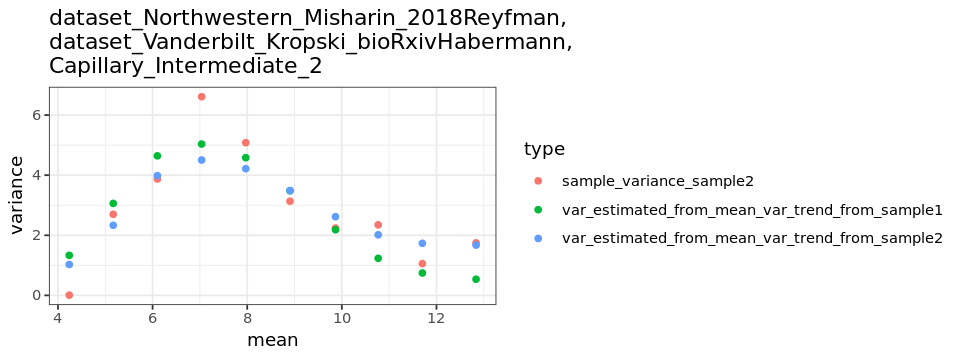

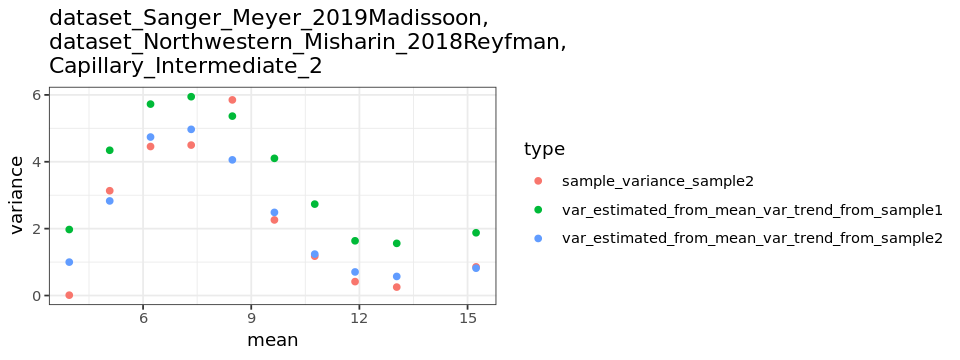

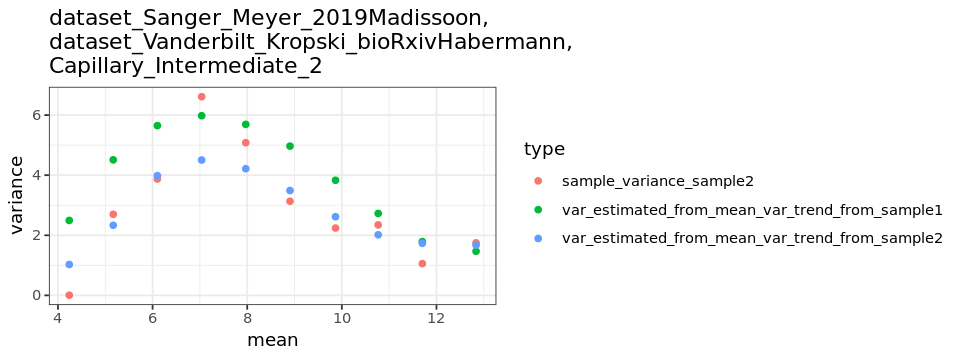

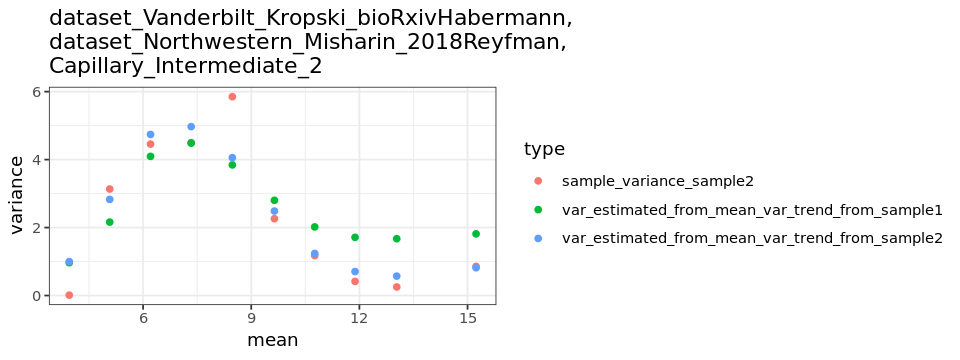

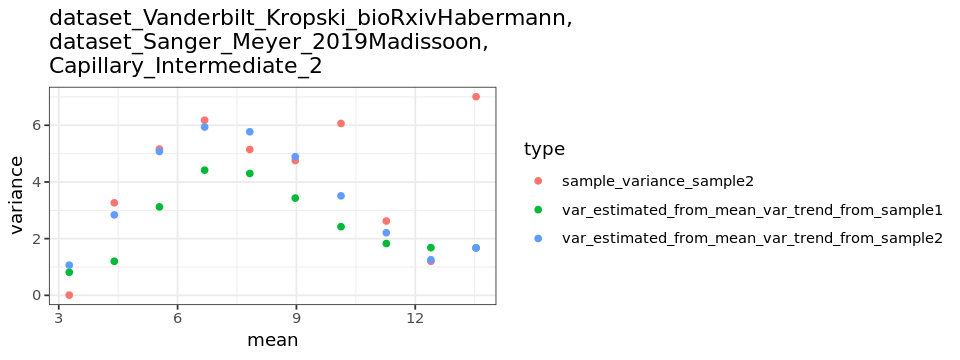

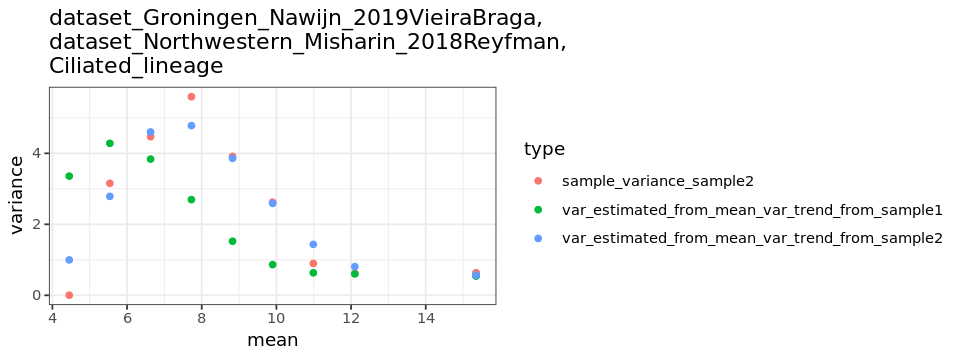

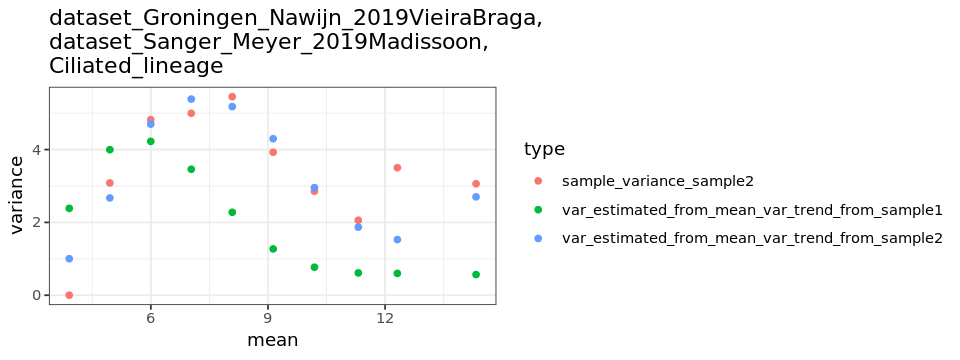

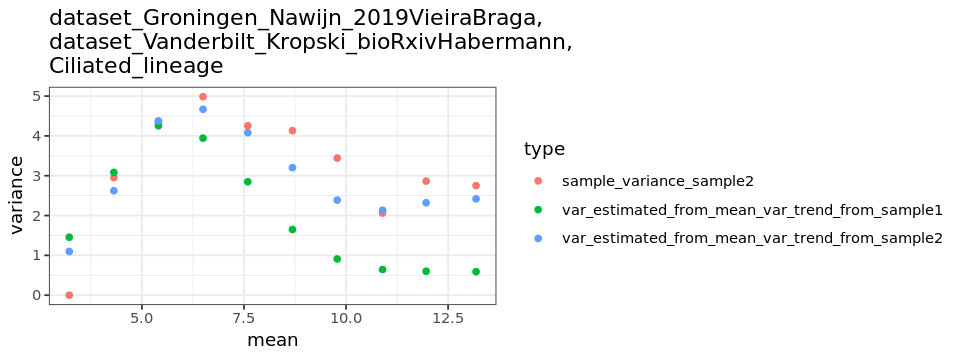

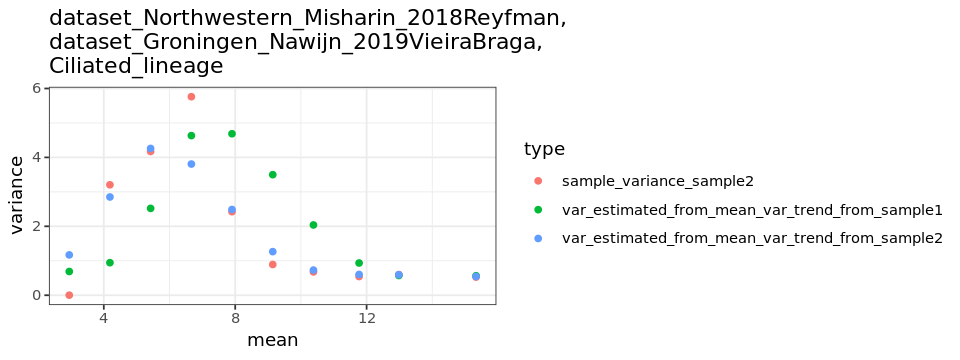

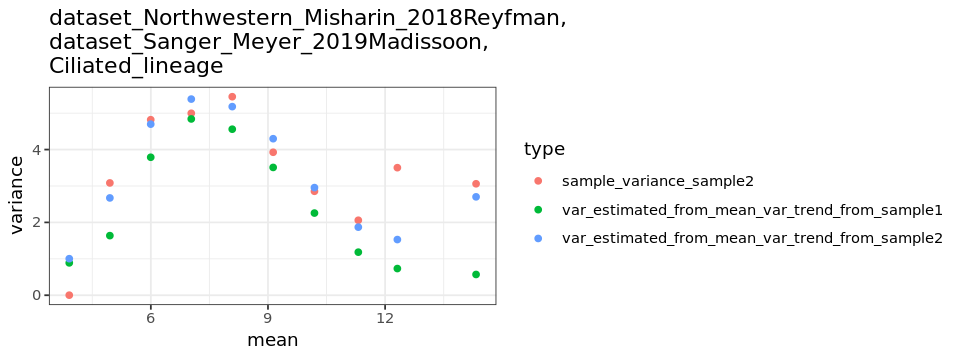

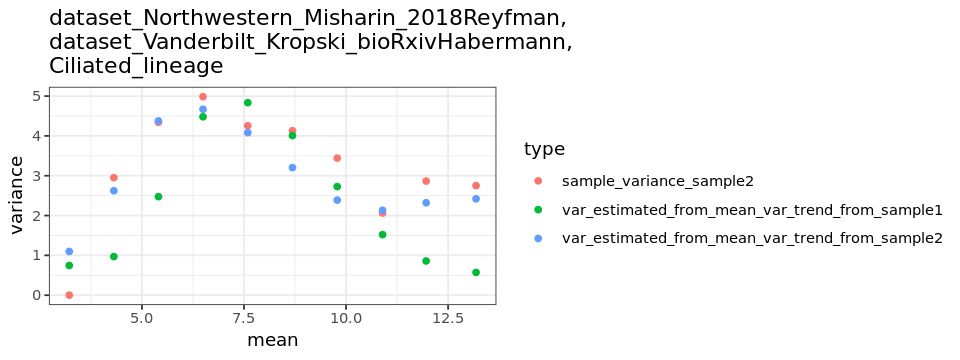

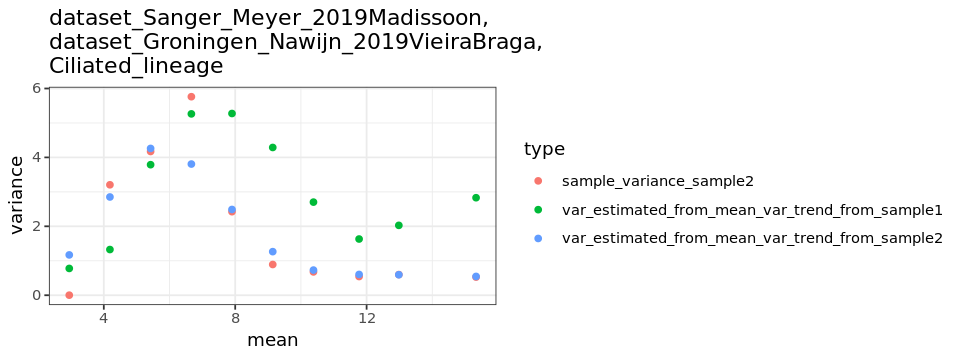

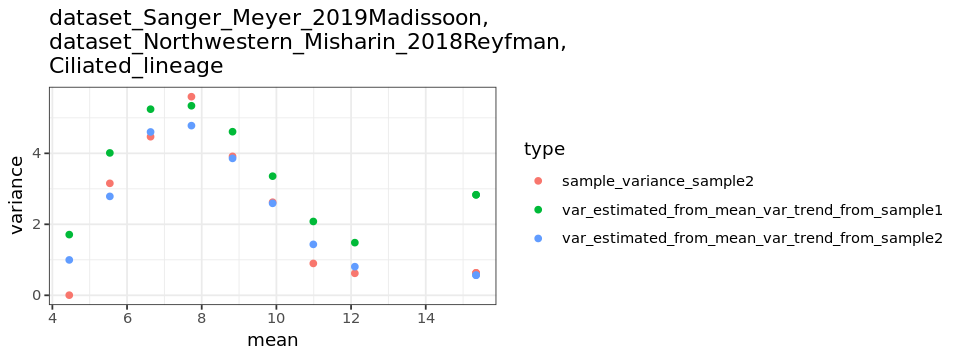

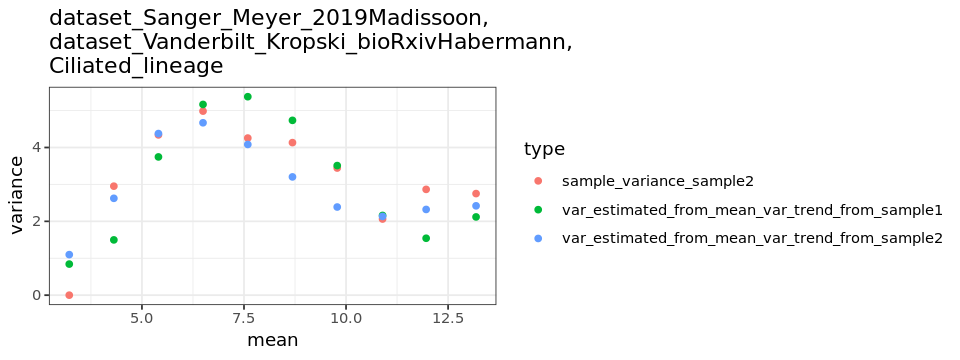

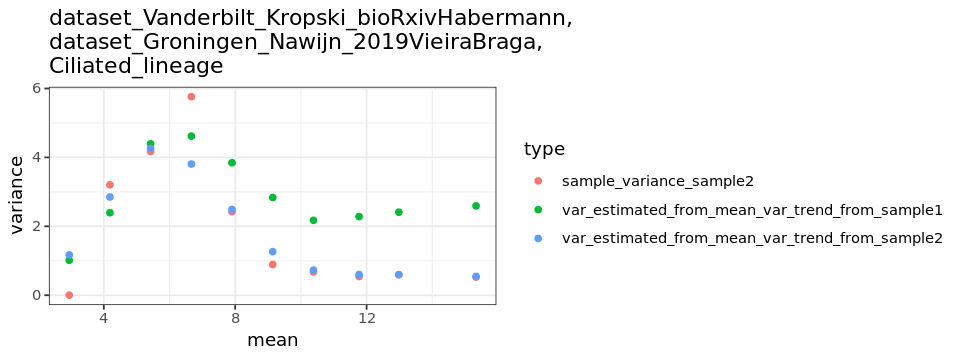

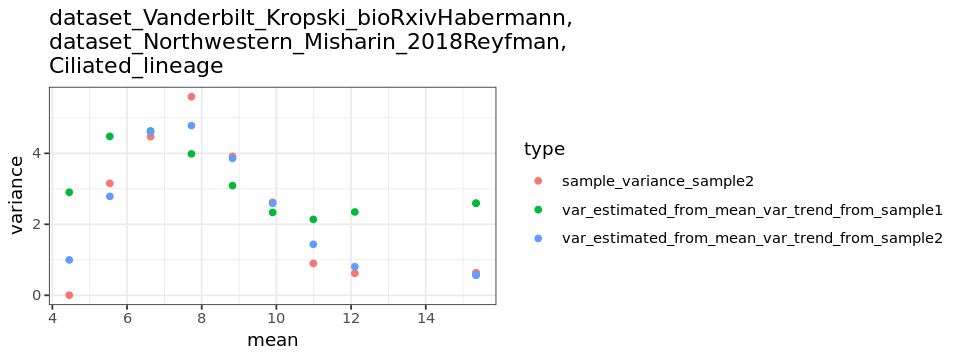

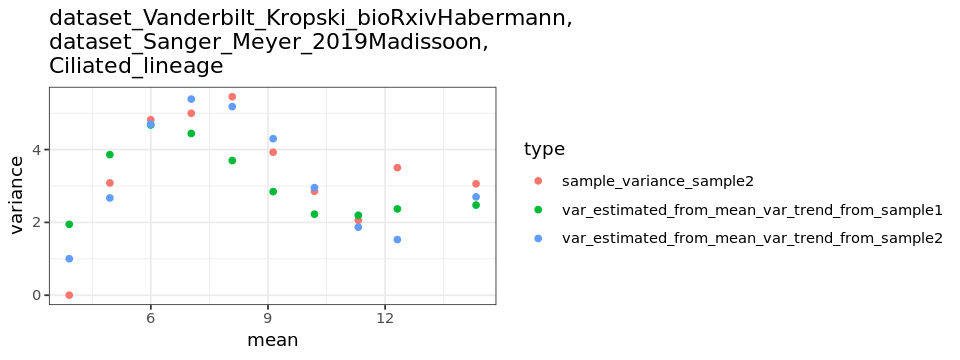

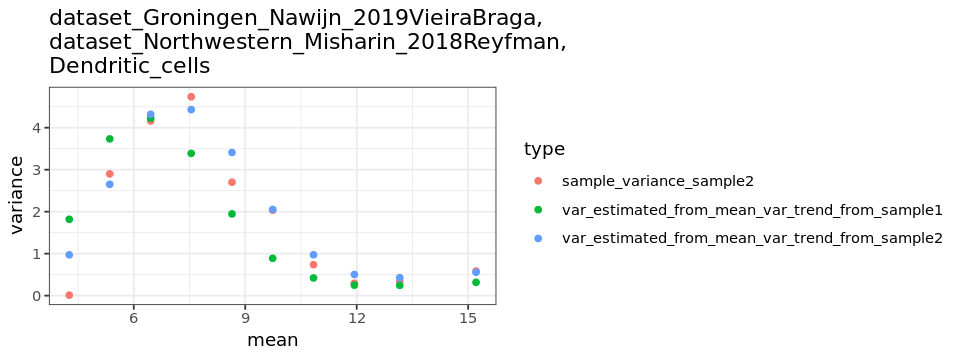

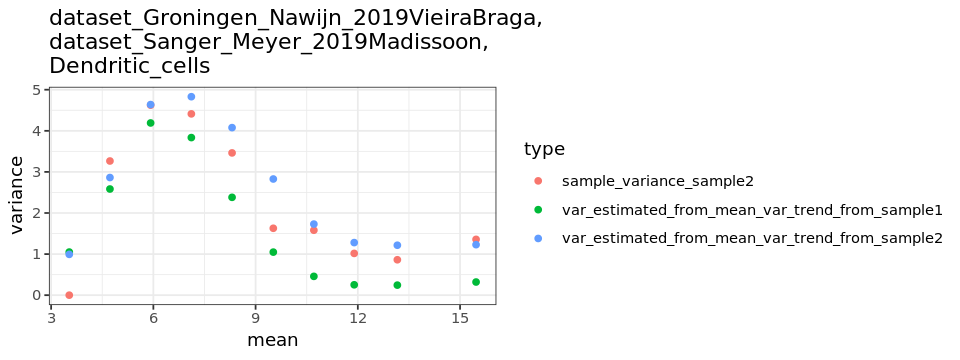

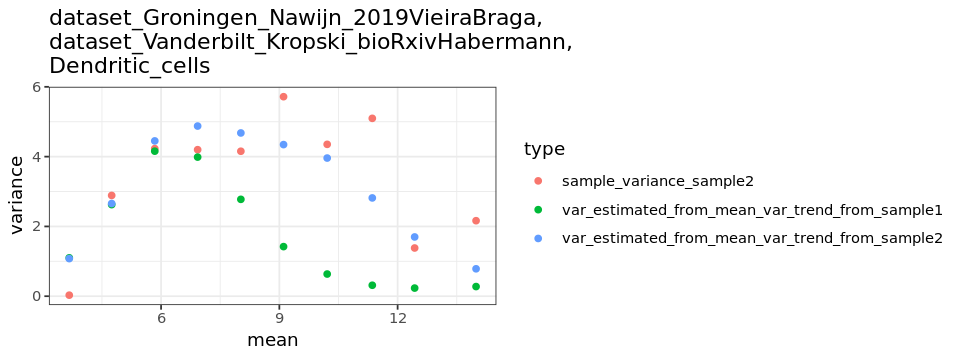

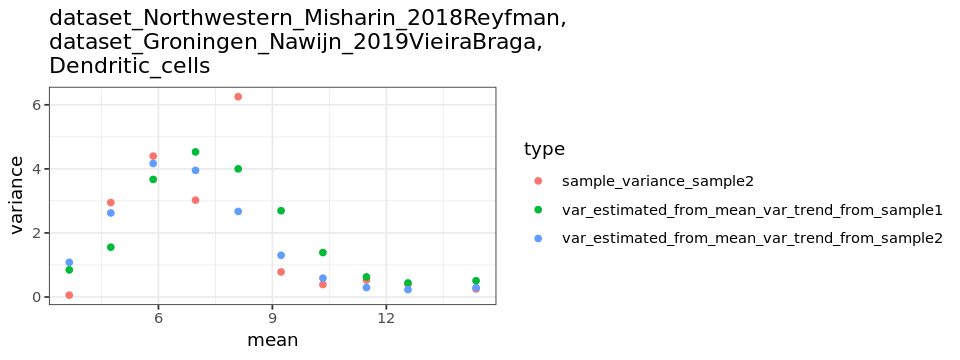

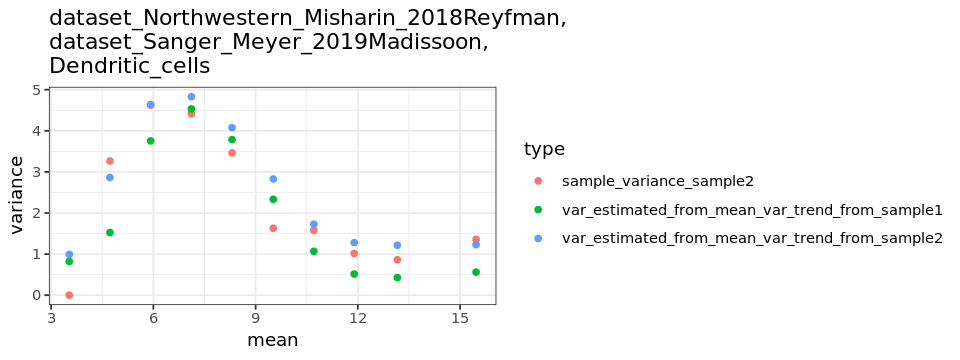

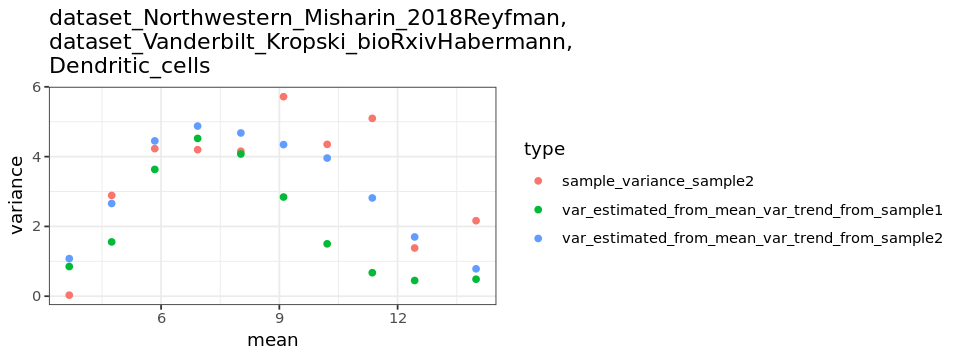

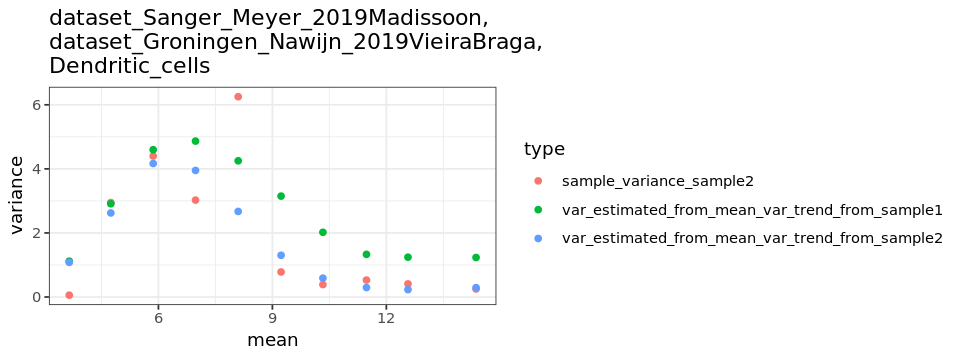

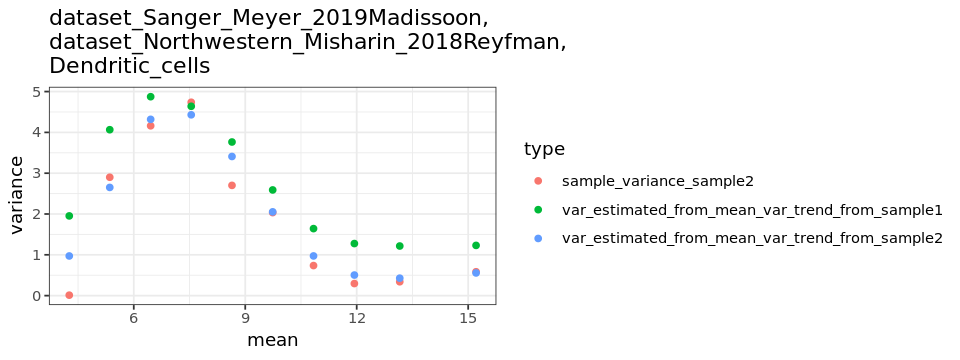

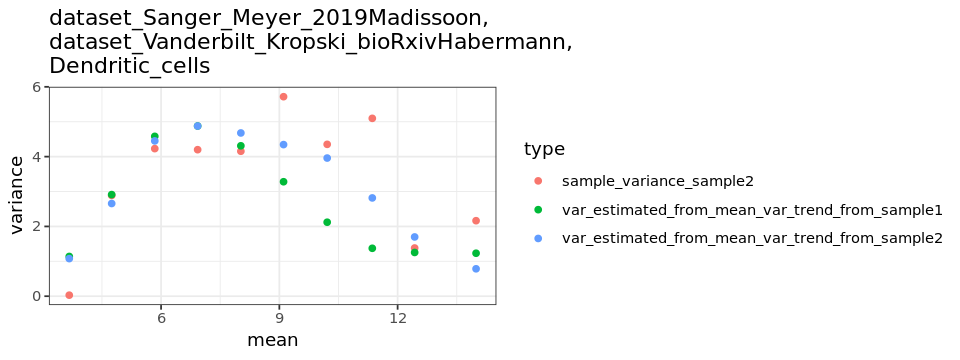

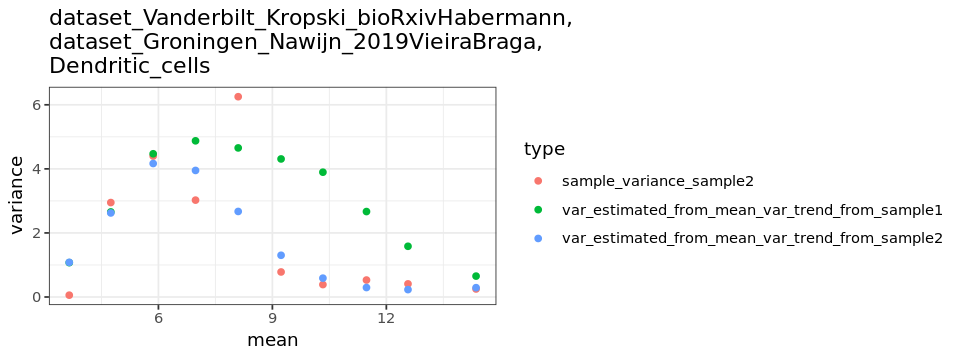

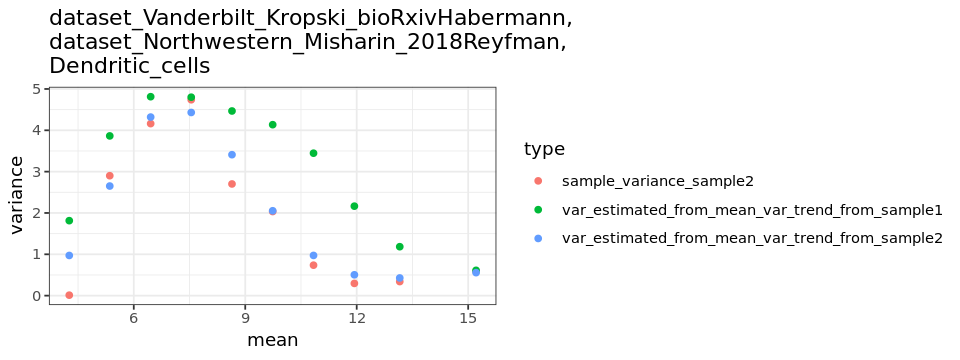

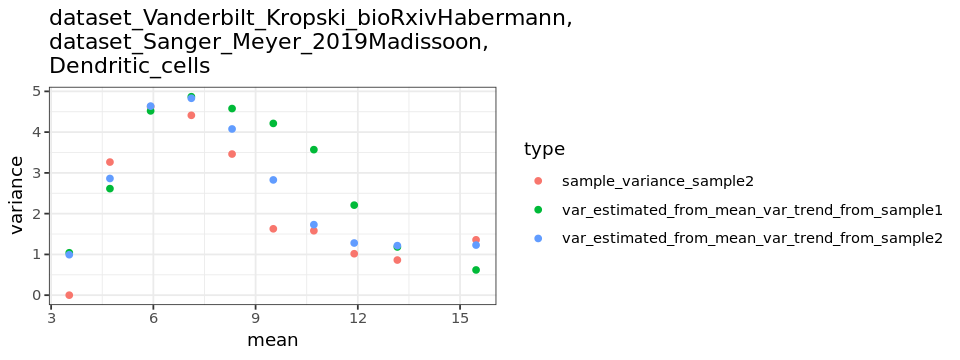

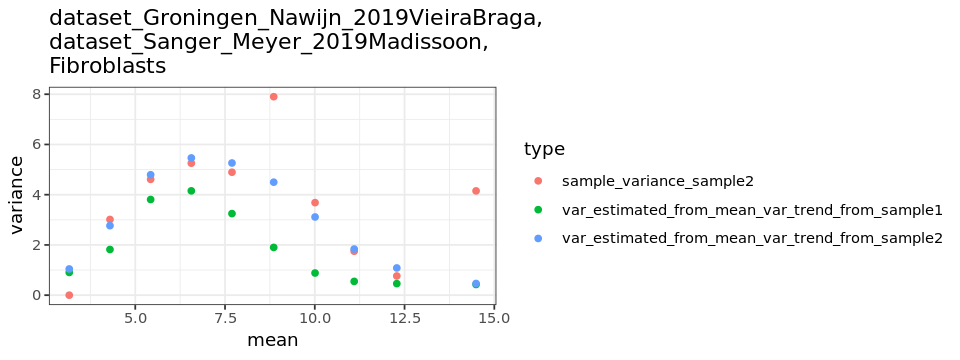

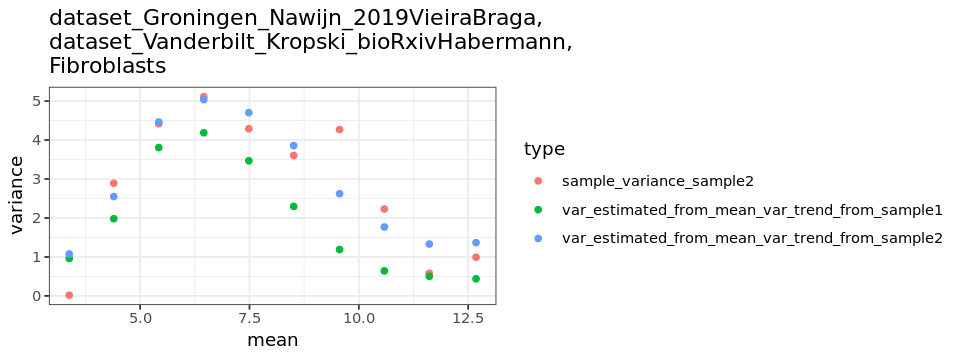

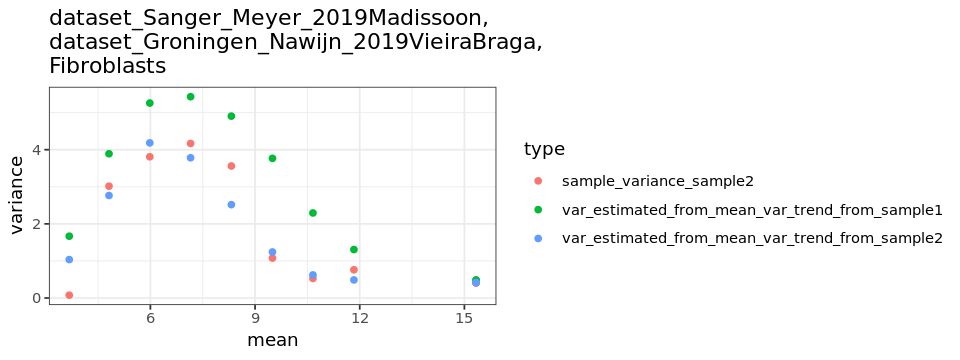

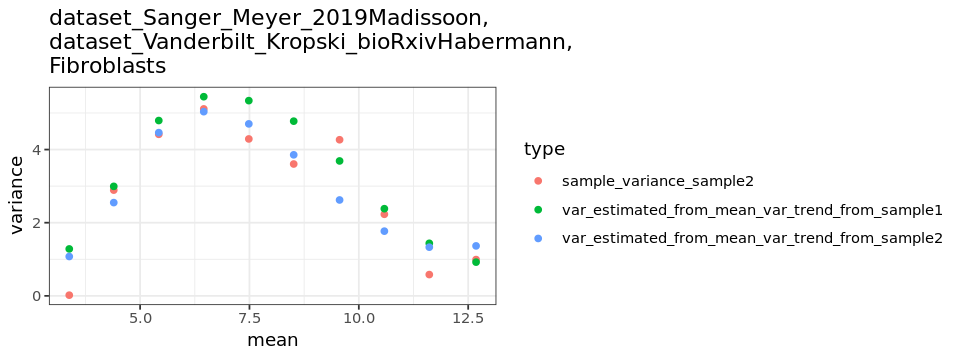

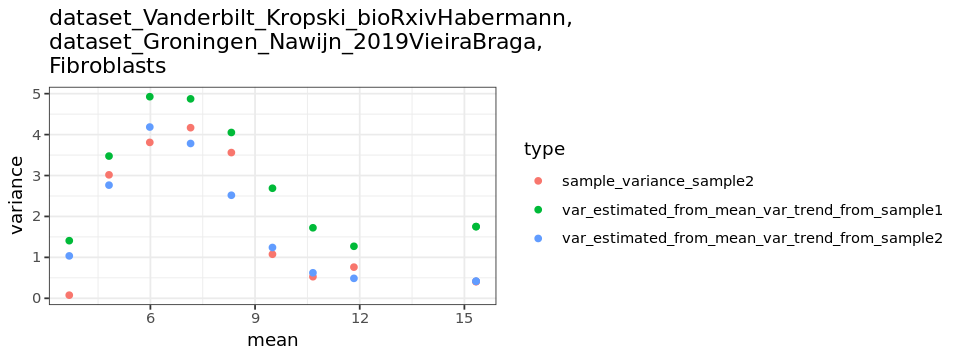

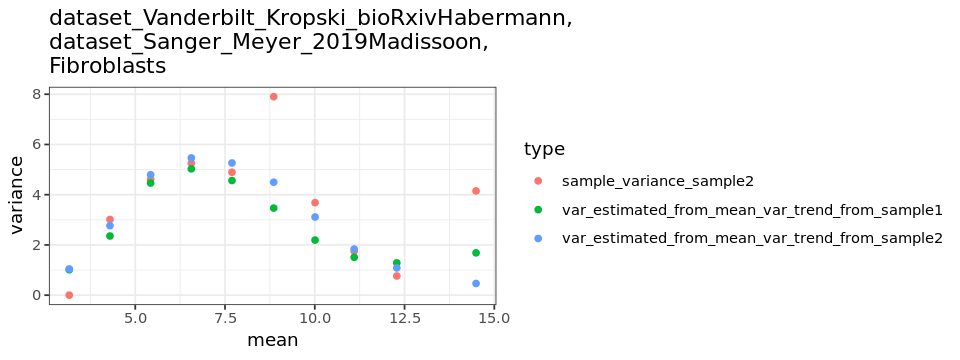

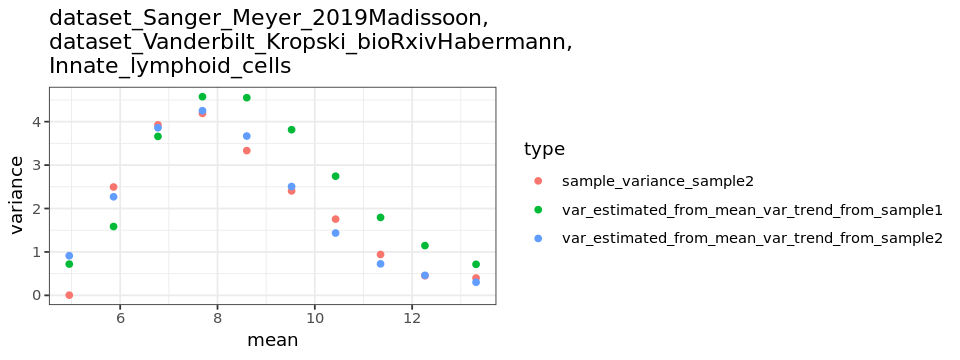

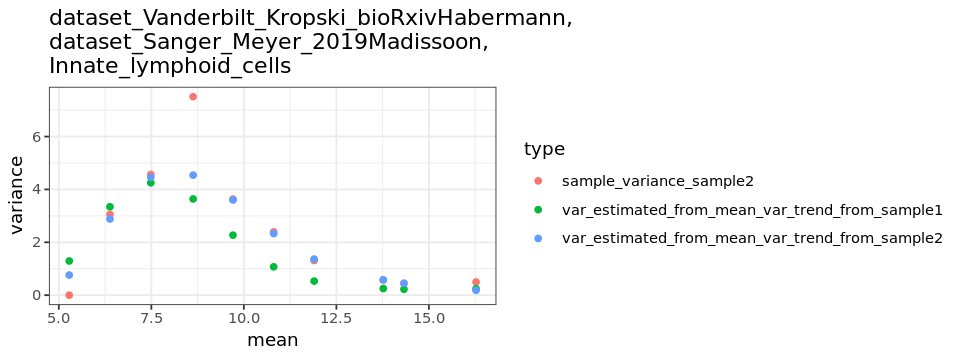

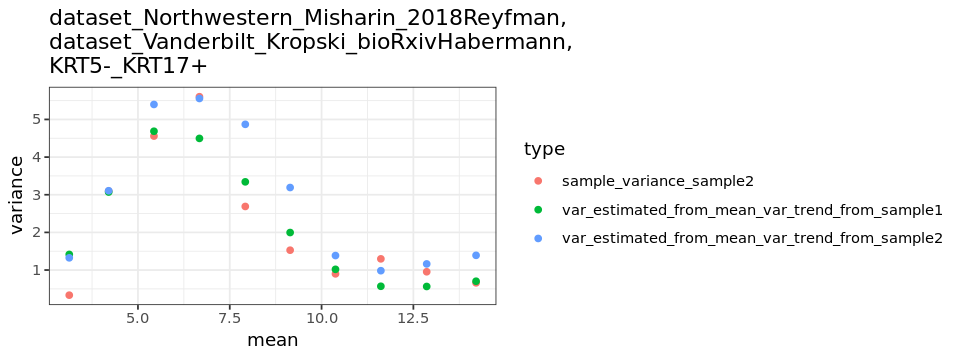

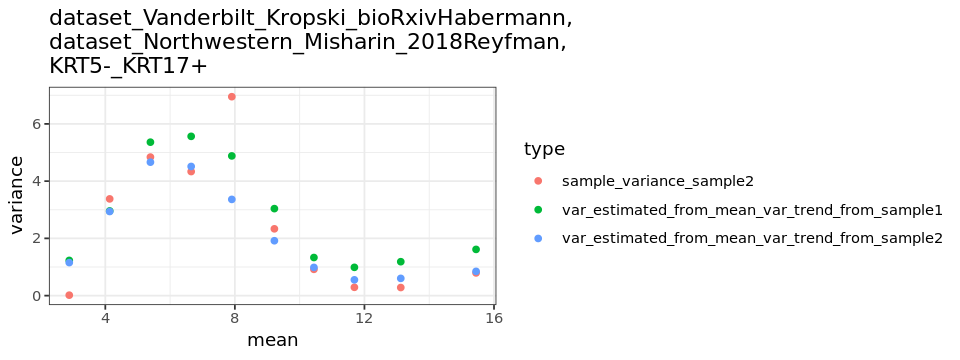

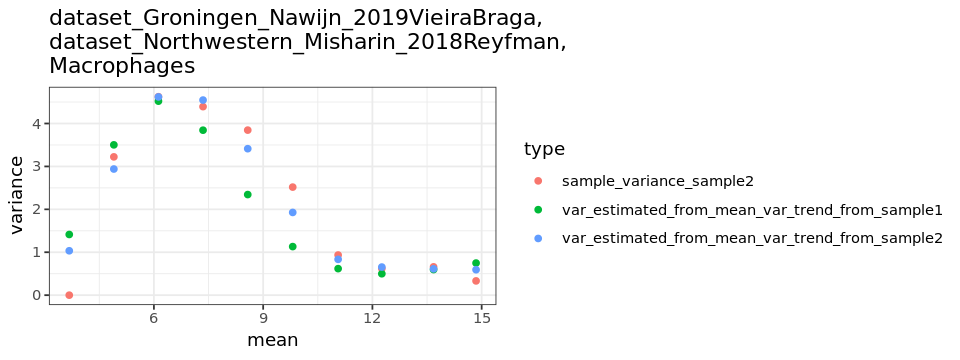

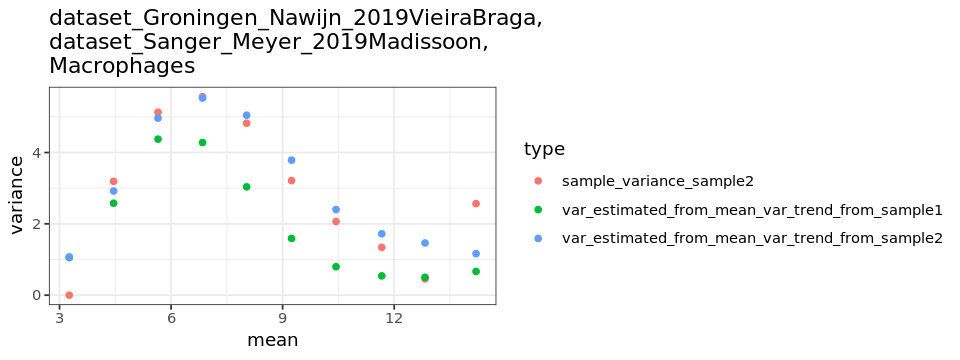

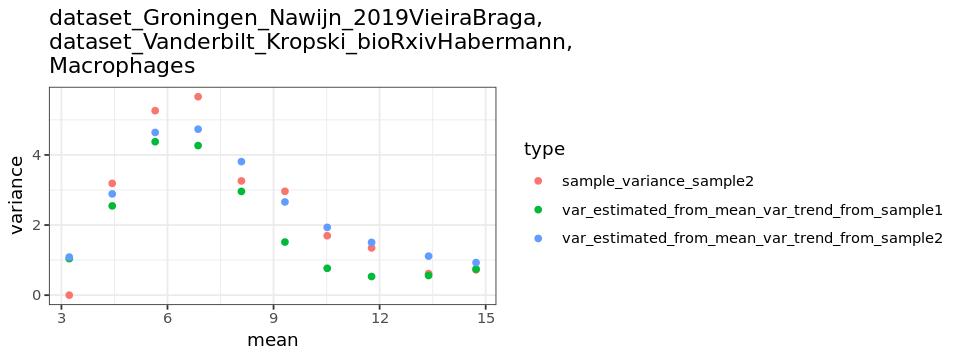

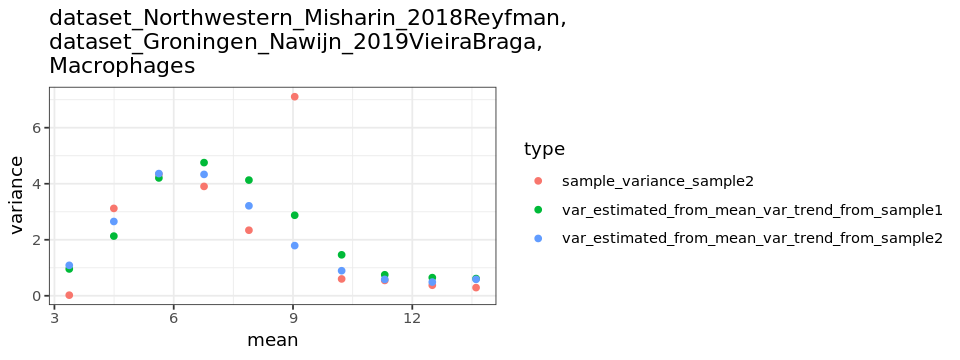

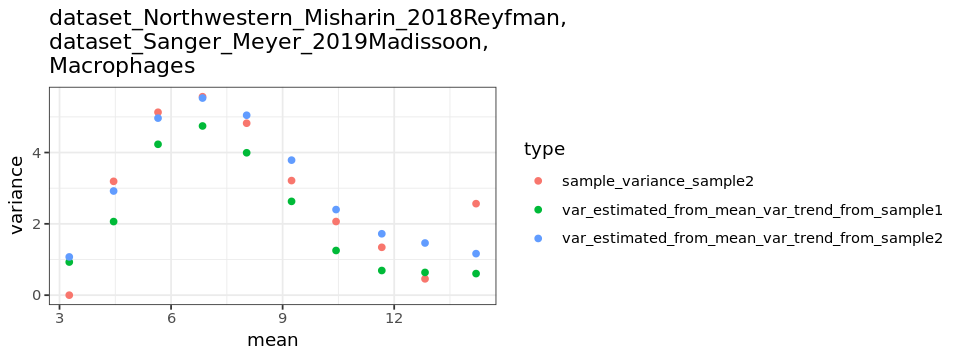

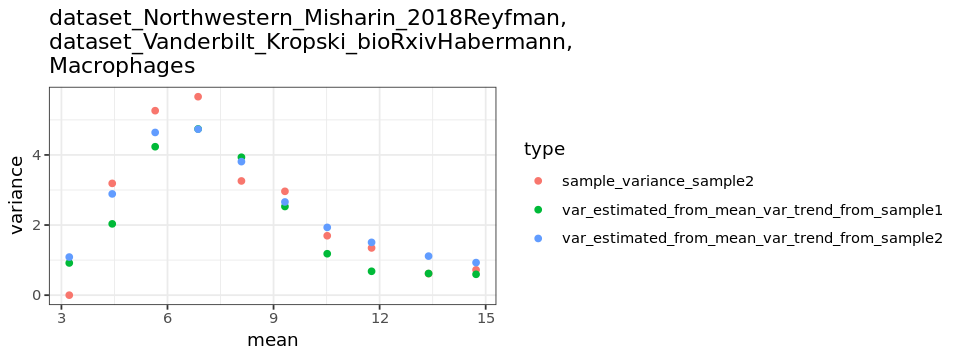

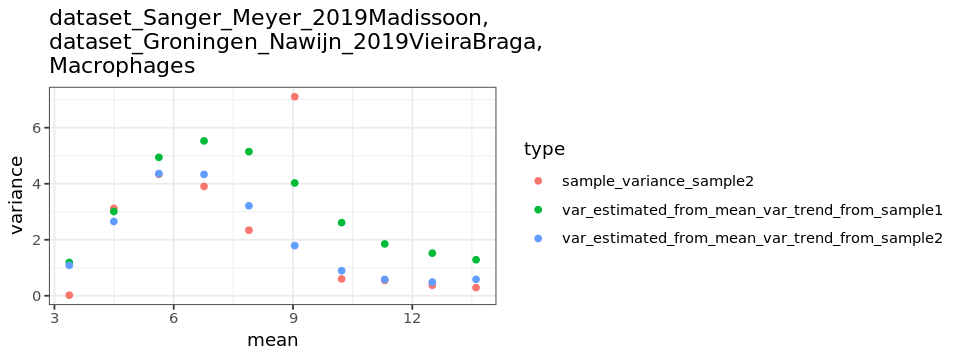

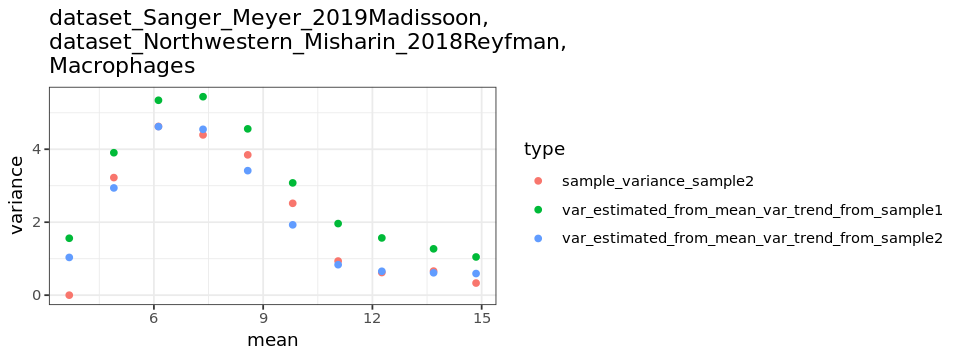

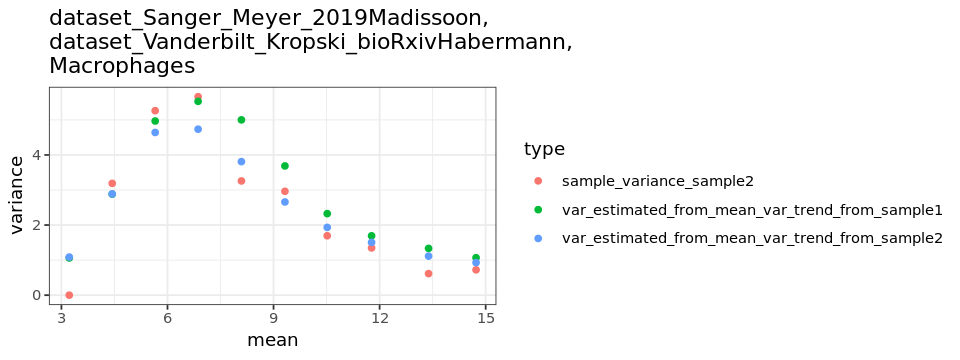

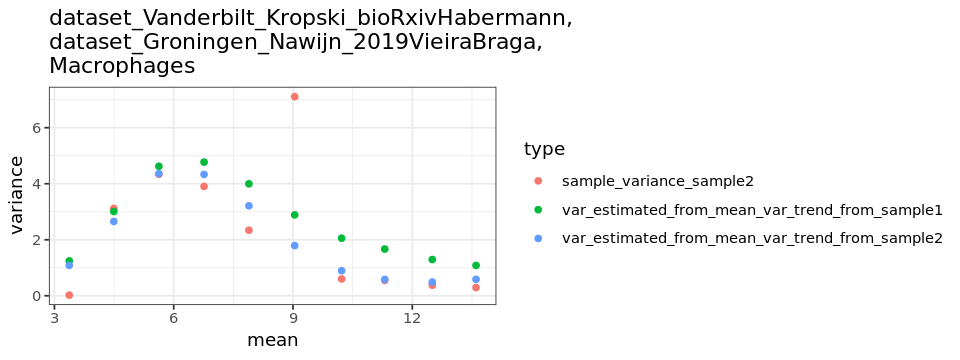

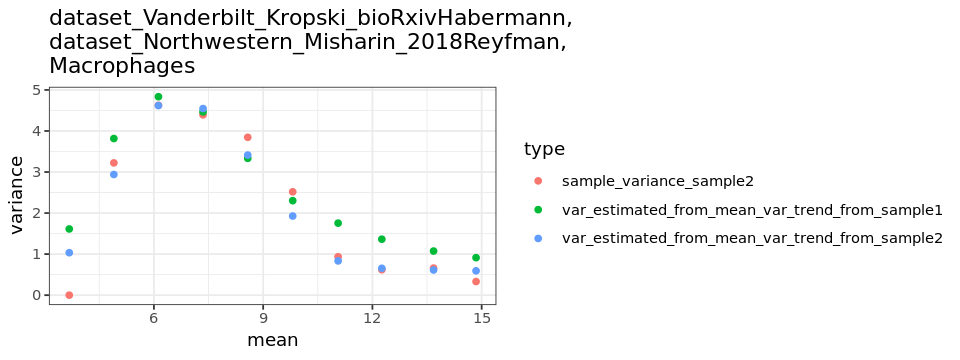

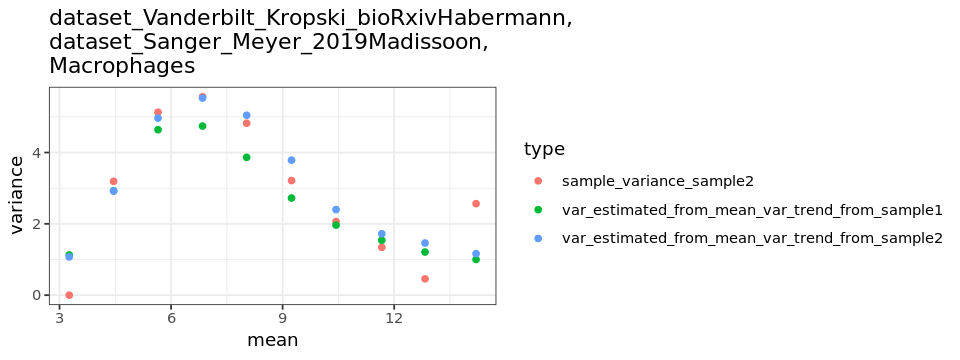

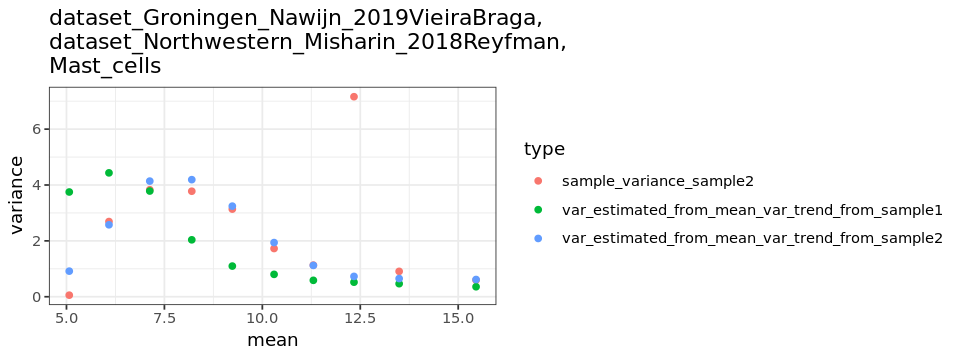

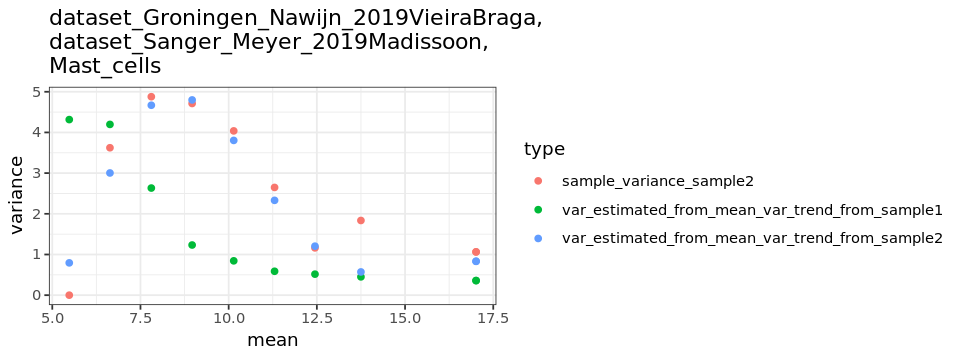

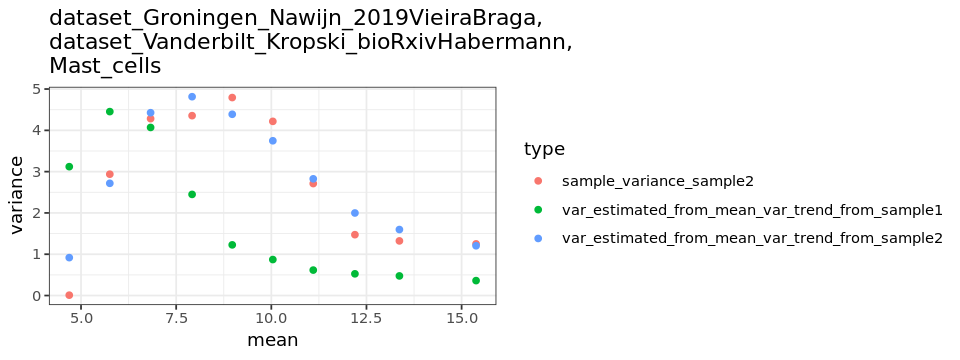

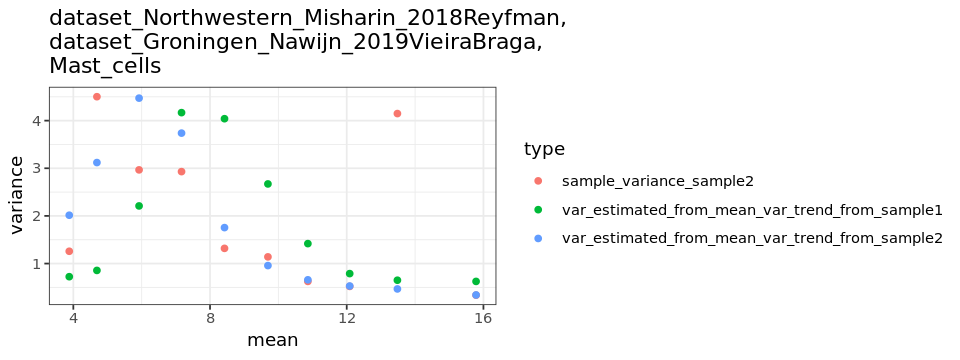

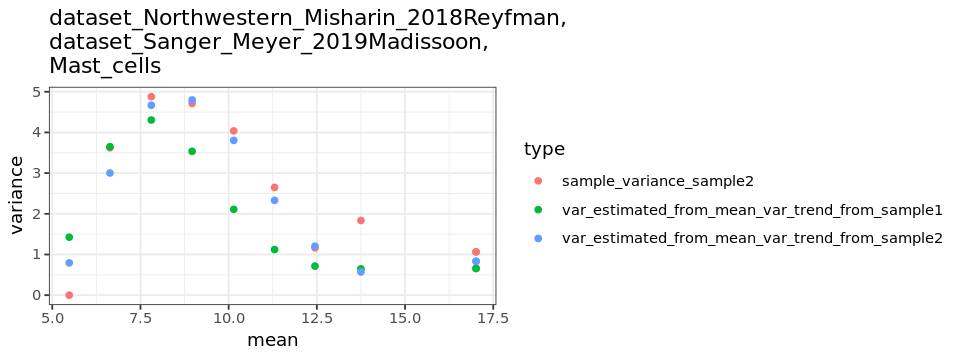

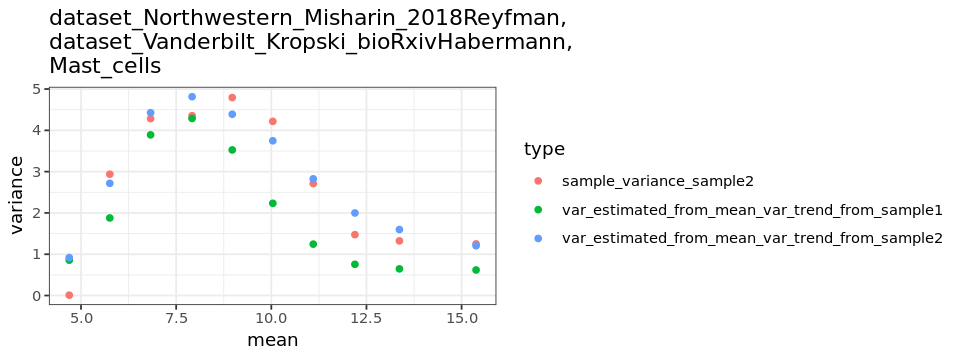

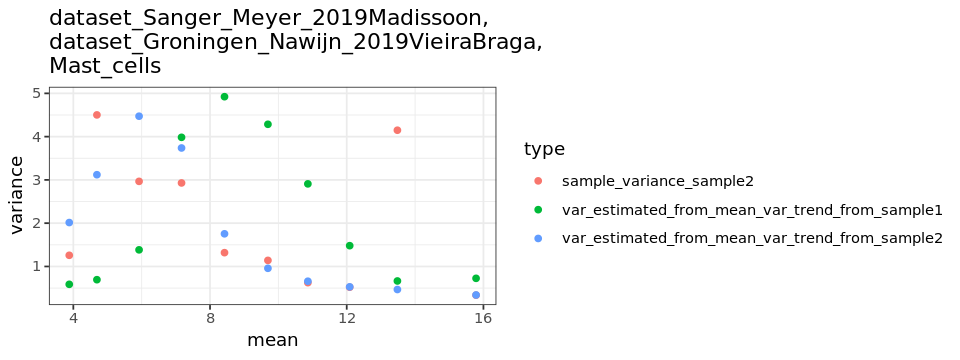

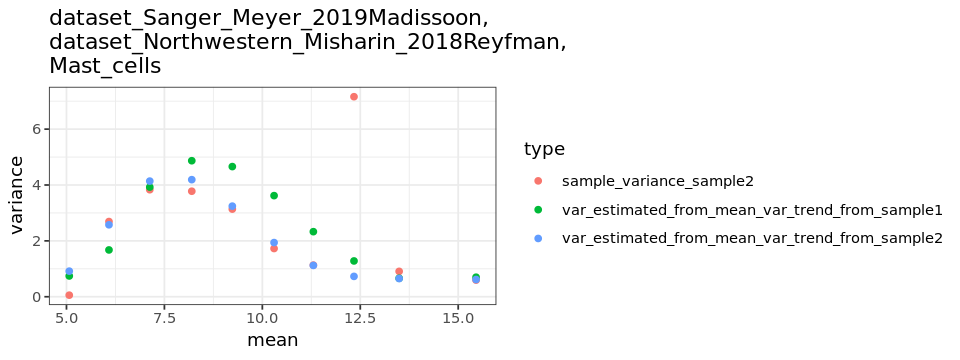

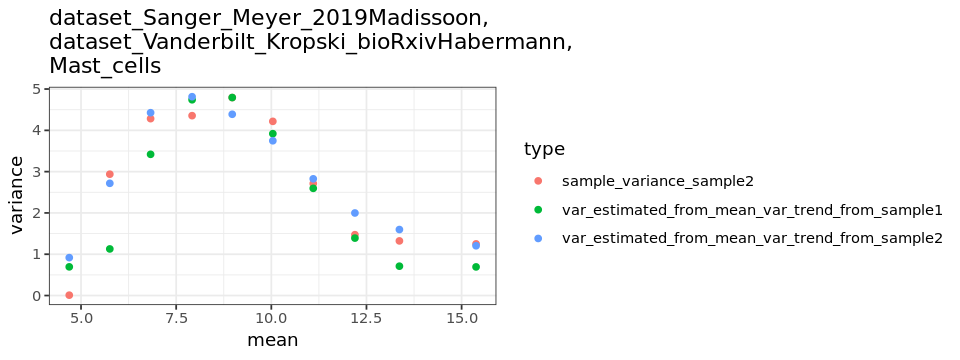

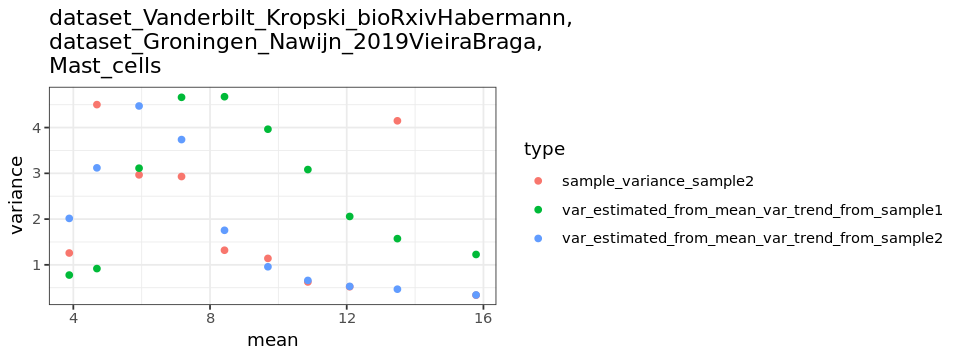

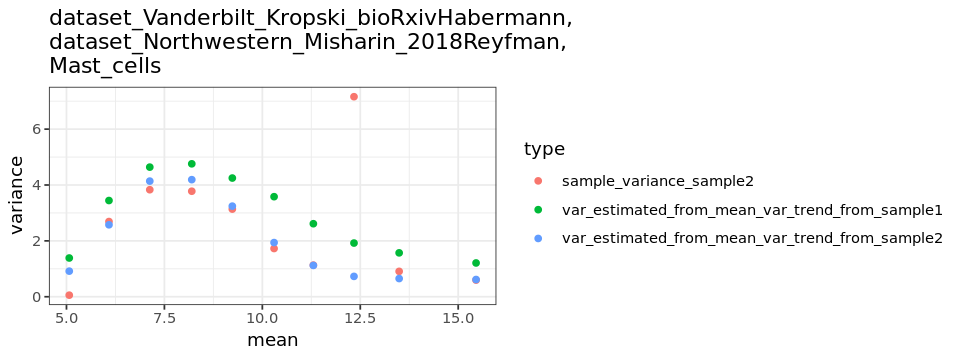

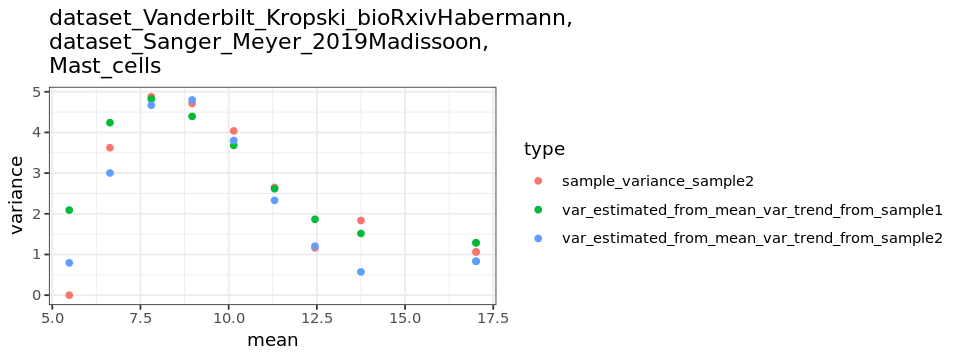

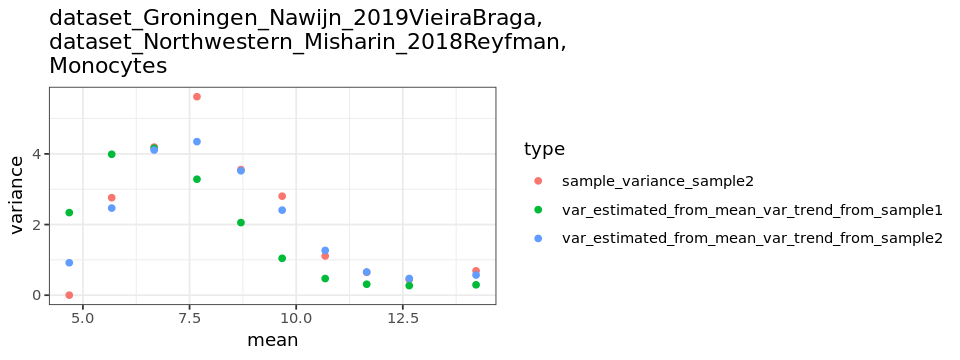

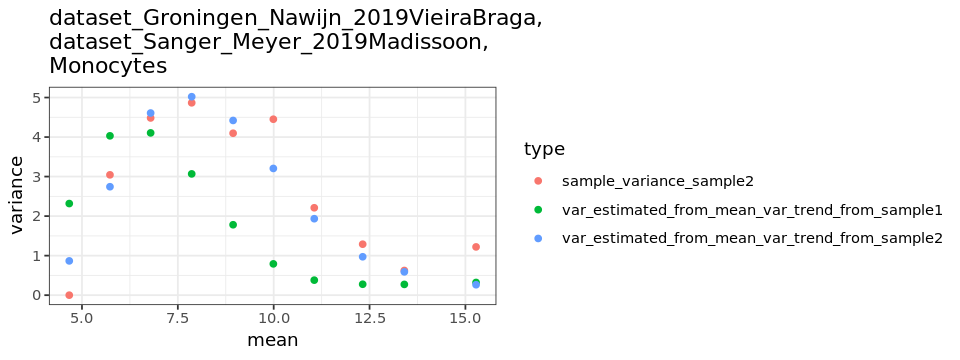

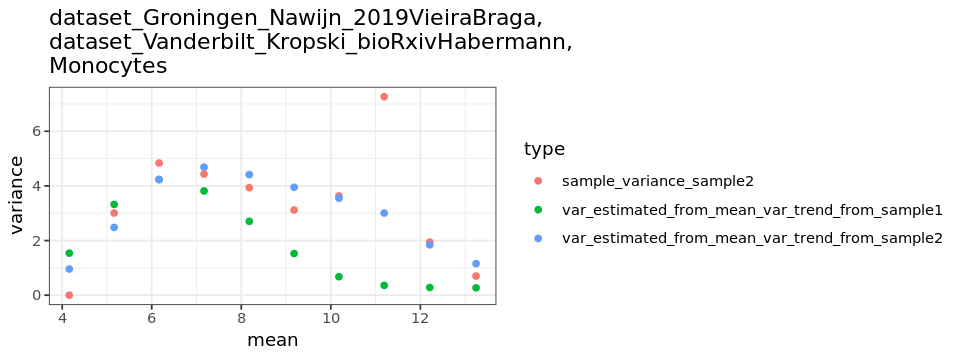

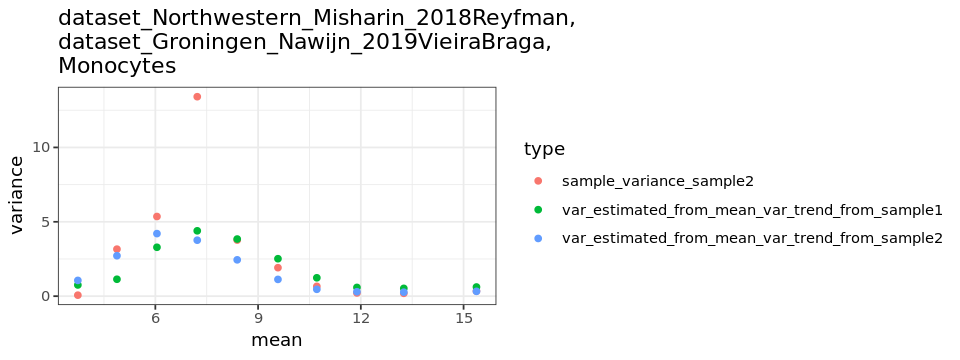

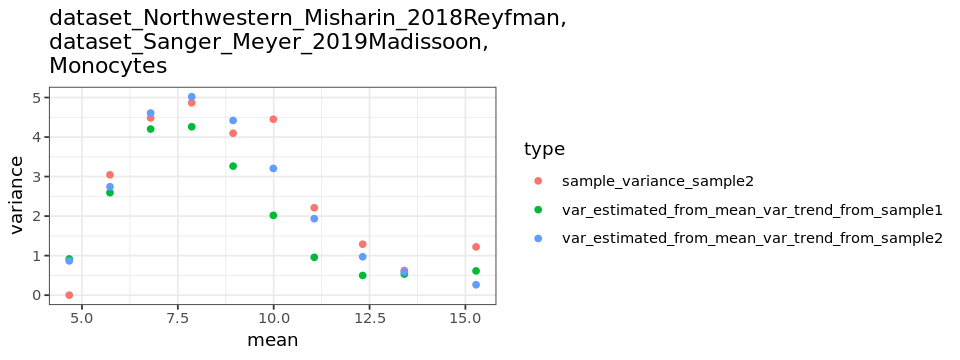

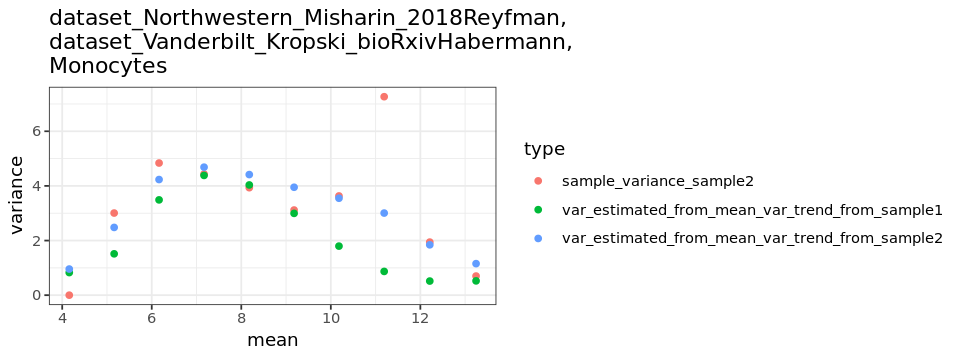

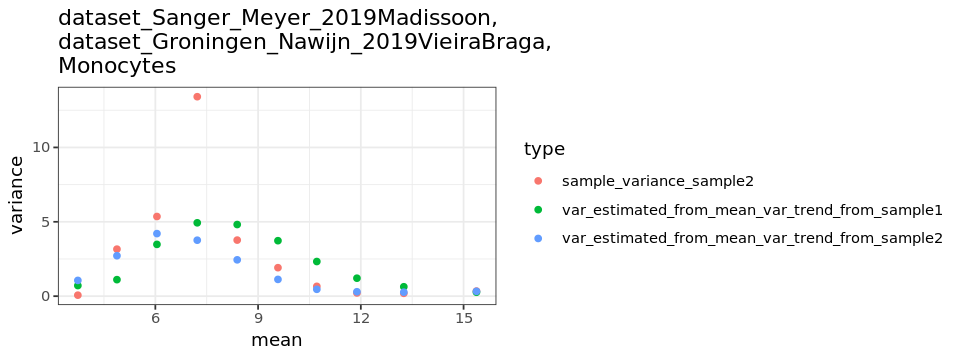

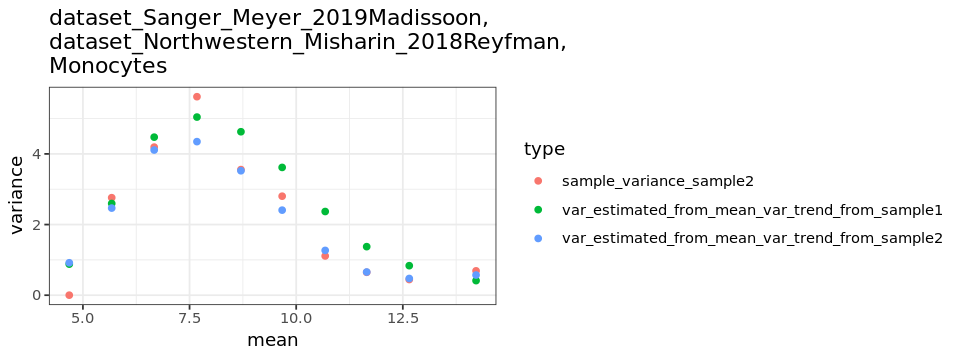

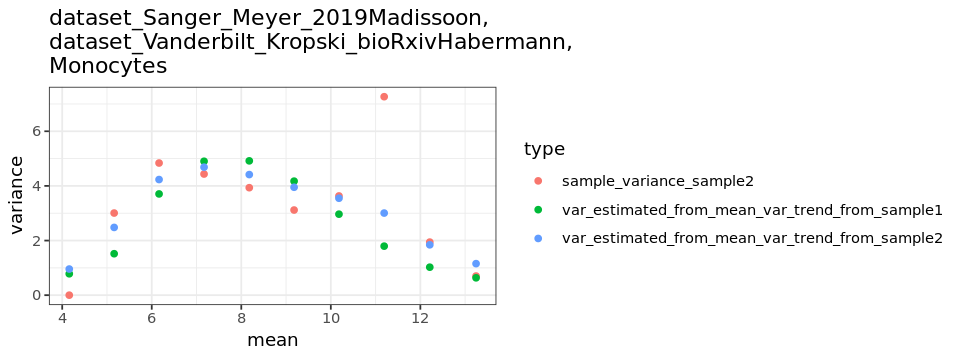

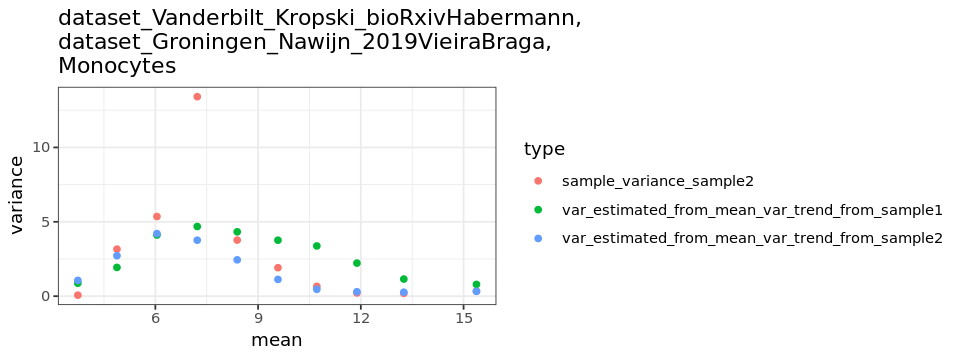

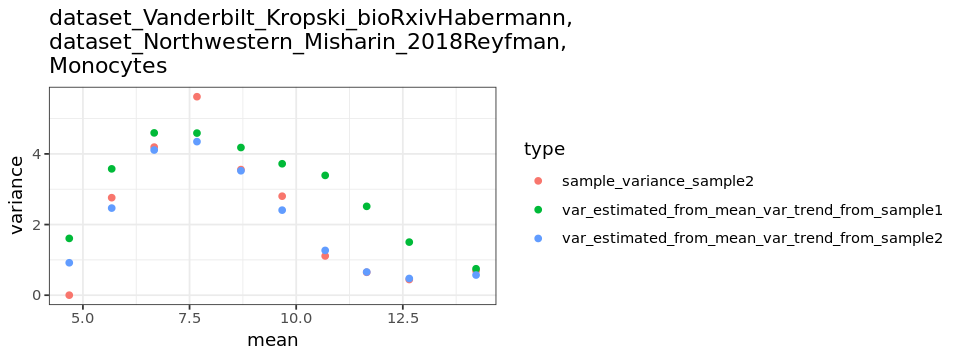

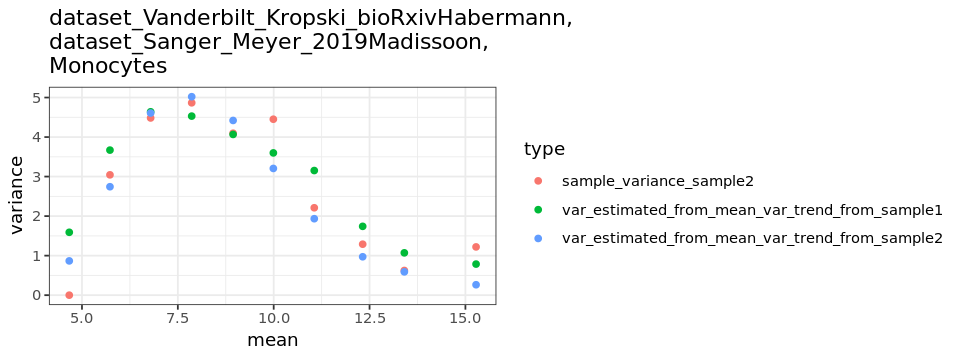

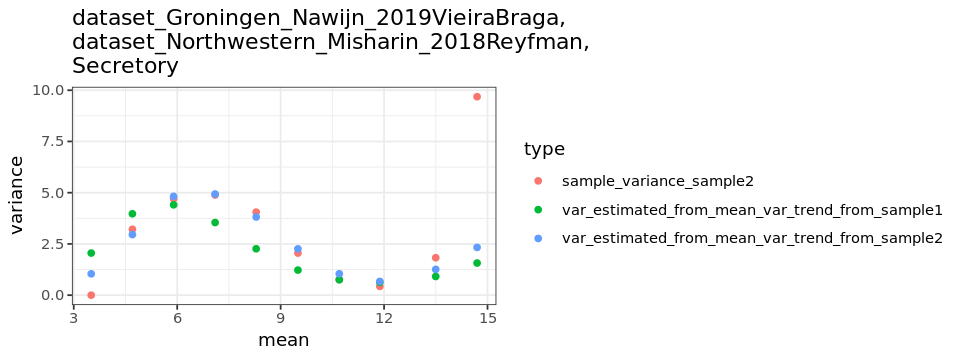

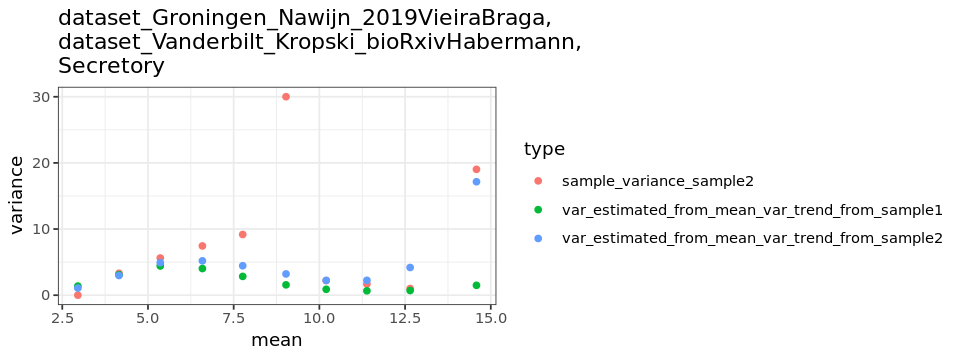

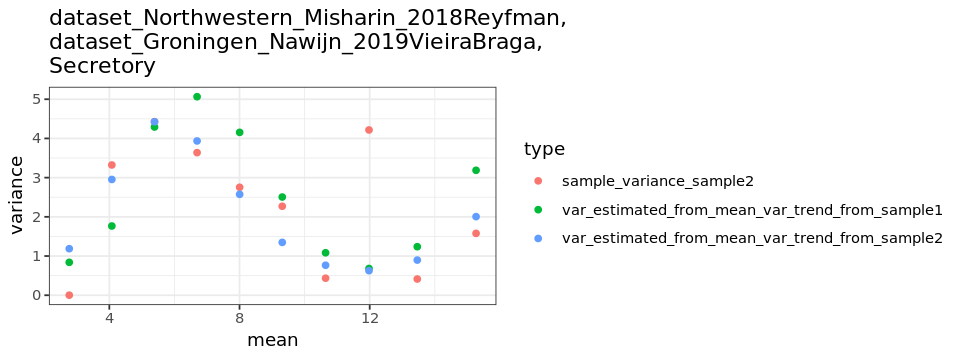

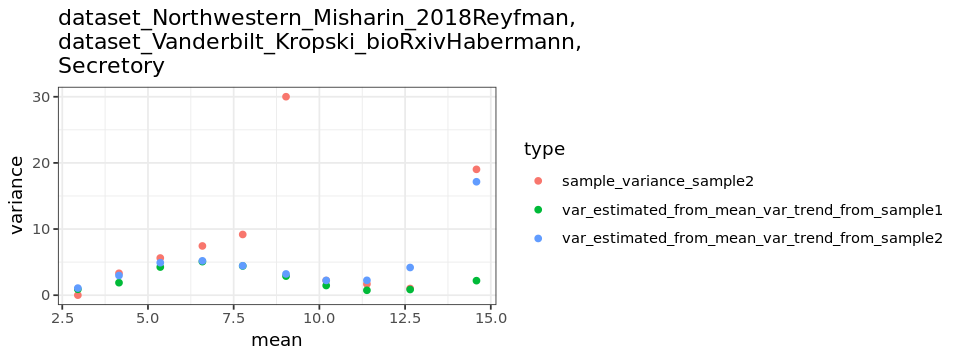

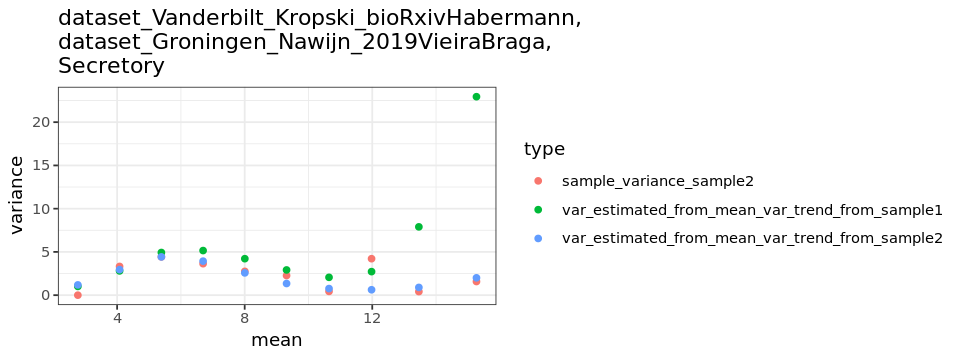

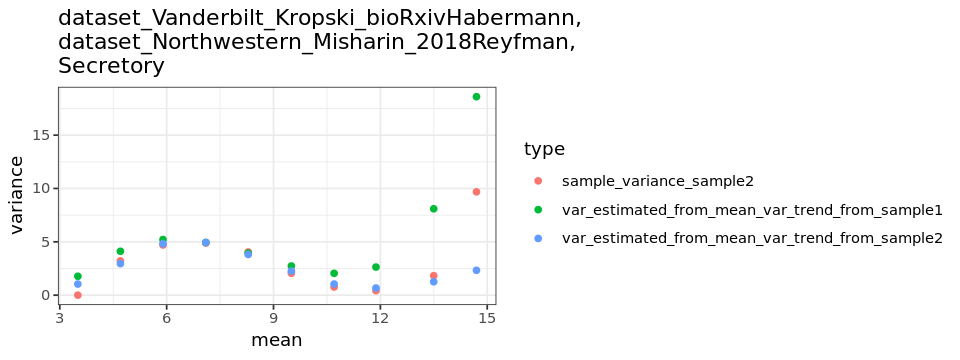

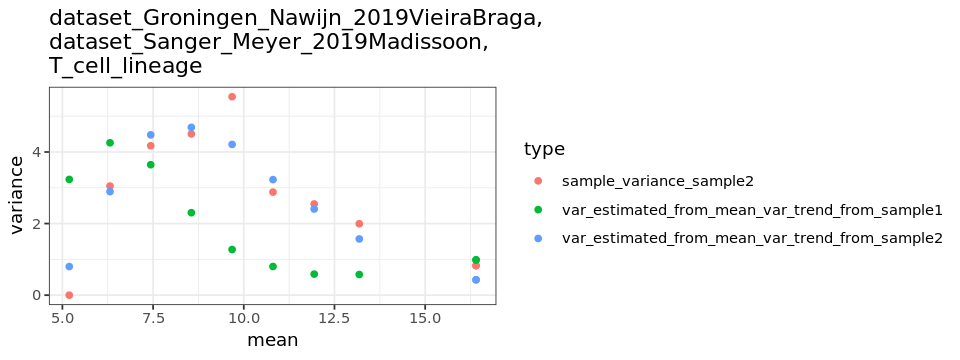

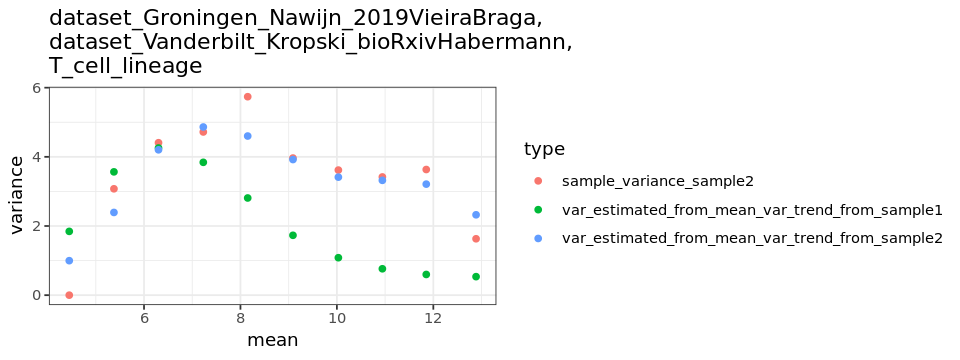

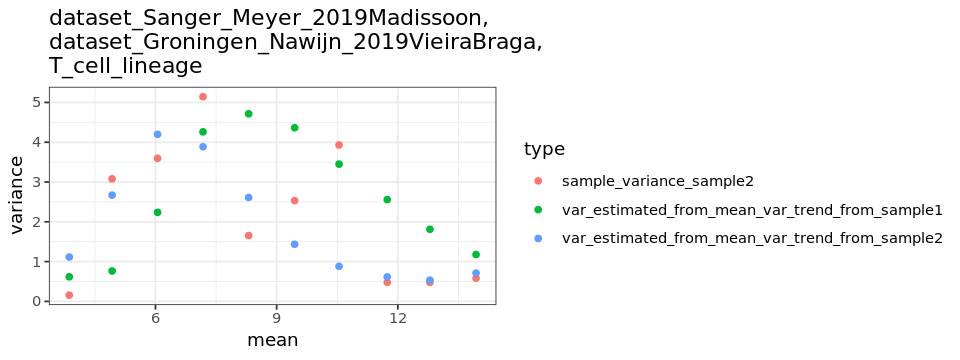

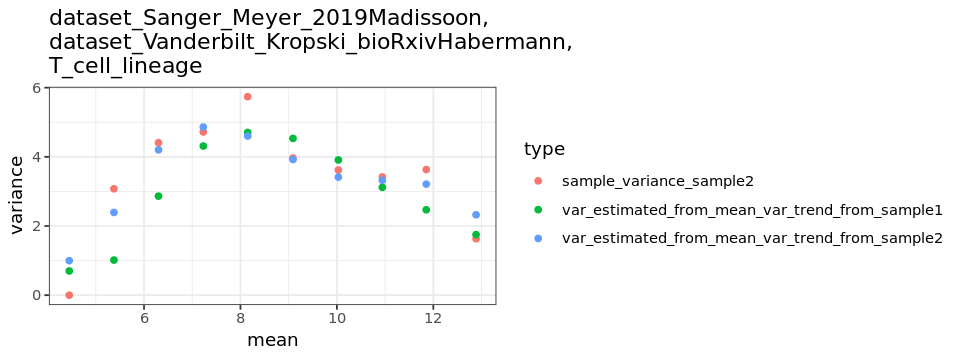

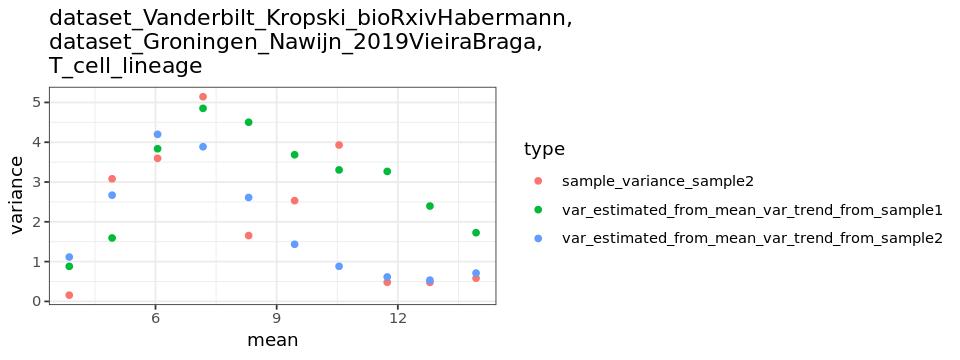

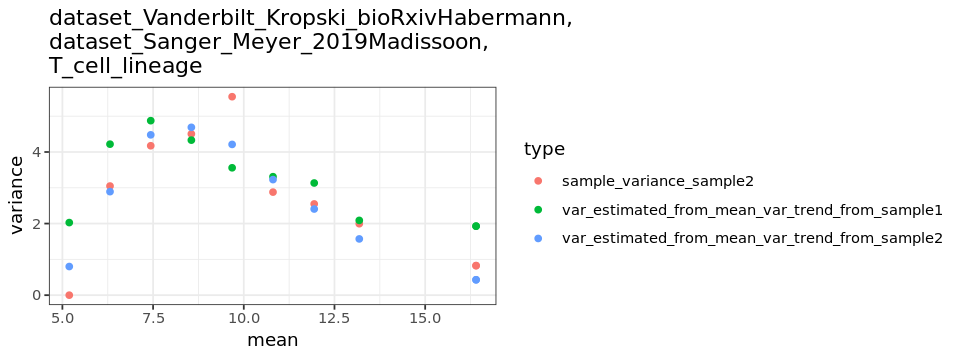

In [64]:
options(repr.plot.width = 8, repr.plot.height = 3)
for (file in myfiles){
#     print(file)
    celltype = gsub("\\.full.*","",gsub("celltype_","",file))
#     print(celltype)
    dataset1 = gsub(".*\\.full_","",gsub("\\.partial_dataset_.*","",file))
#     print(dataset1)
    dataset2 = gsub(".*\\.partial_","",gsub(".csv","",file))
#     print(dataset2)
    filename = paste0(full_dir,file)
    df = read.csv(filename, row.names = 1)
    plotting_df = make_plotting_df(df)
    p = ggplot(plotting_df, aes(x = mean, y = variance, col = type)) + geom_point() + theme_bw()
    print(p + ggtitle(paste0(dataset1,", \n",dataset2,", \n",celltype)))
}

In [65]:
get_distance_from_df <- function(df){
    df$dist = abs(df$sampled_variance-df$est_from_full_variance)
    mean(df$dist)
}

In [66]:
dist_df = data.frame()

In [67]:
for (file in myfiles){
    celltype = gsub("\\.full.*","",gsub("celltype_","",file))
    dataset1 = gsub(".*\\.full_","",gsub("\\.partial_dataset_.*","",file))
    dataset2 = gsub(".*\\.partial_","",gsub(".csv","",file))
    filename = paste0(full_dir,file)
    df = read.csv(filename, row.names = 1)
    dist = get_distance_from_df(df)
    dist_df = rbind(dist_df, data.frame(dataset1 = dataset1, dataset2 = dataset2, celltype = celltype, 
                                        avg_distance = dist, n_genes = nrow(df), 
                                        ncells_dataset1 = df$n_cells_dataset1[1], 
                                        ncells_dataset2 = df$n_cells_dataset2[1]))
}

In [68]:
head(dist_df)

dataset1                                   
1 dataset_Northwestern_Misharin_2018Reyfman  
2 dataset_Northwestern_Misharin_2018Reyfman  
3 dataset_Sanger_Meyer_2019Madissoon         
4 dataset_Sanger_Meyer_2019Madissoon         
5 dataset_Vanderbilt_Kropski_bioRxivHabermann
6 dataset_Vanderbilt_Kropski_bioRxivHabermann
  dataset2                                    celltype        avg_distance
1 dataset_Sanger_Meyer_2019Madissoon          2_Blood_vessels 2.0386063   
2 dataset_Vanderbilt_Kropski_bioRxivHabermann 2_Blood_vessels 1.5705752   
3 dataset_Northwestern_Misharin_2018Reyfman   2_Blood_vessels 1.7203392   
4 dataset_Vanderbilt_Kropski_bioRxivHabermann 2_Blood_vessels 2.1175246   
5 dataset_Northwestern_Misharin_2018Reyfman   2_Blood_vessels 0.7182668   
6 dataset_Sanger_Meyer_2019Madissoon          2_Blood_vessels 2.0588351   
  n_genes ncells_dataset1 ncells_dataset2
1 10       569            2624           
2 10       569            2761           
3 10      2624             569           
4 10      2624            2761           
5 10      2761             569           
6 10      2761            2624

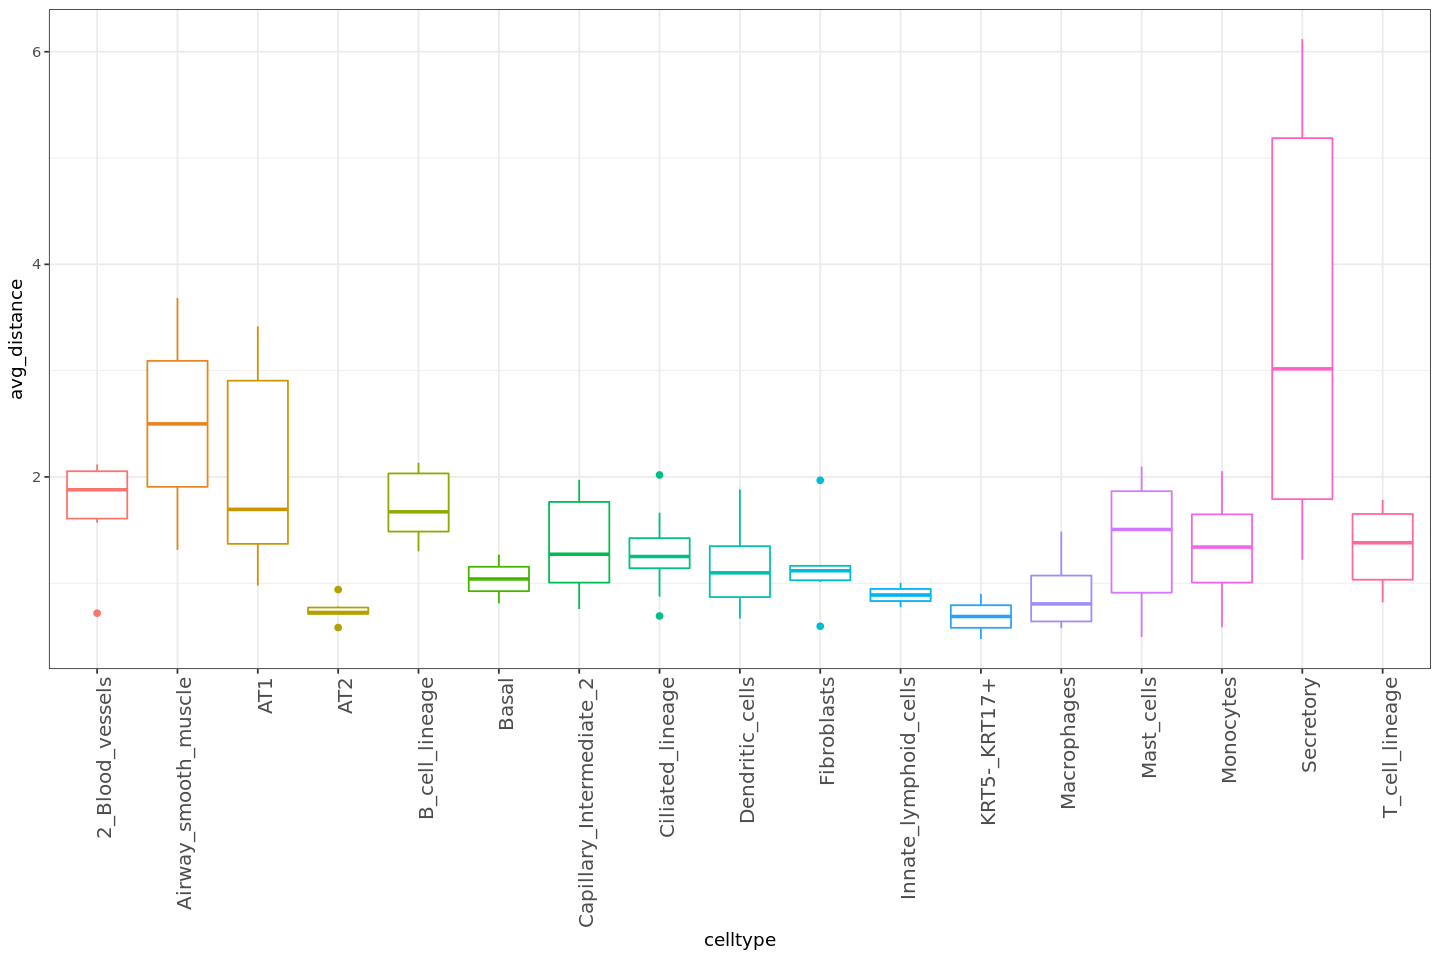

In [69]:
options(repr.plot.width = 12, repr.plot.height = 8)
ggplot(dist_df, aes(x = celltype, y = avg_distance, colour = celltype)) + geom_boxplot() + theme_bw() +
    theme(legend.position = "none", axis.text.x = element_text(angle = 90, hjust = 1, size = 12))

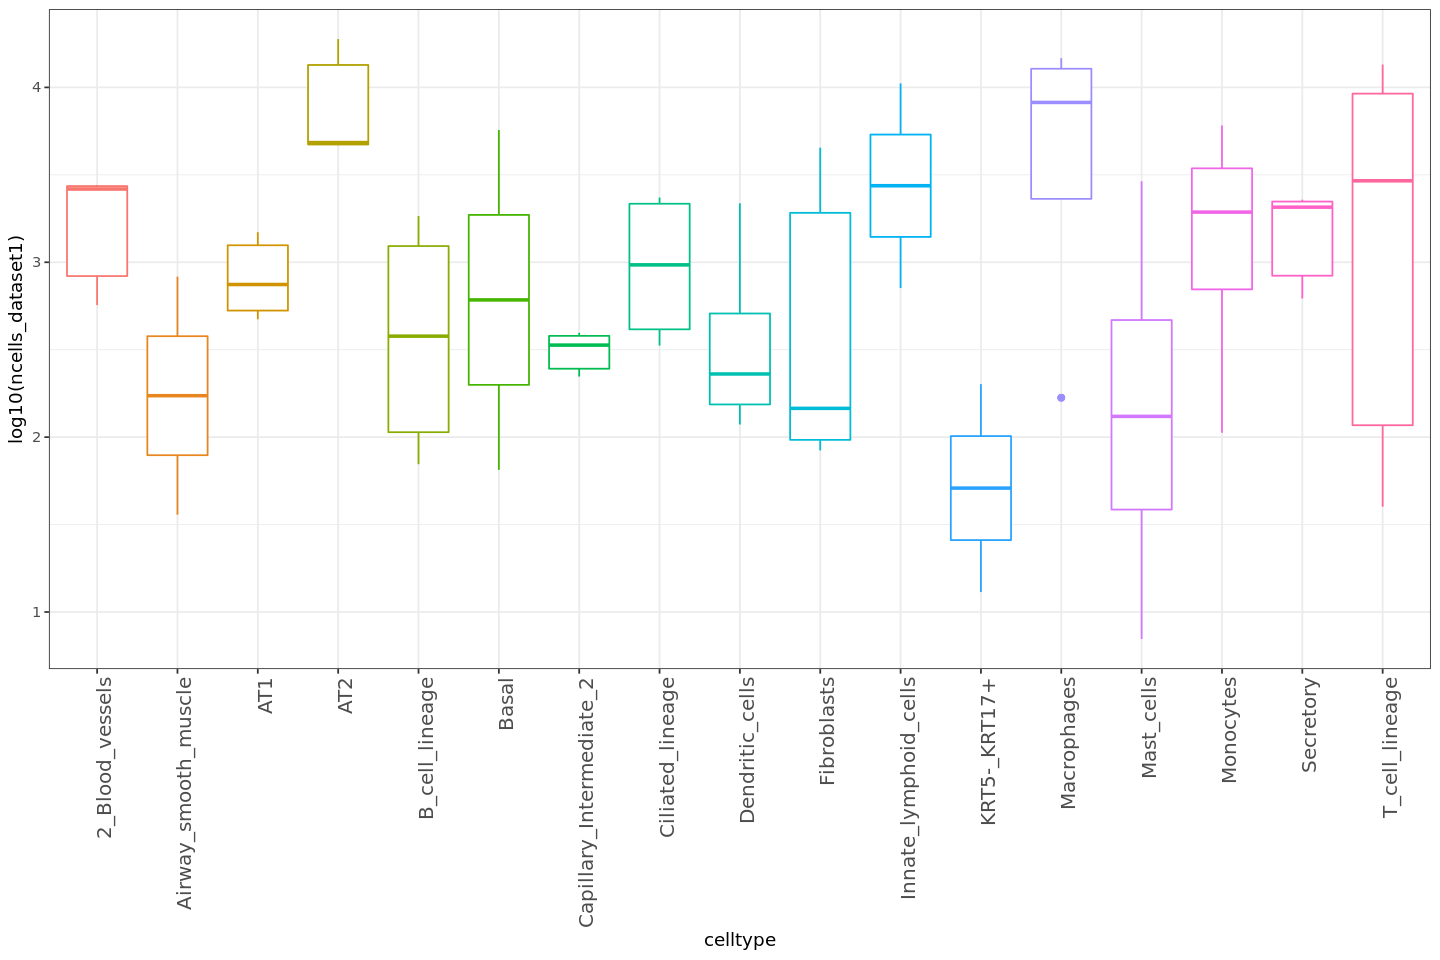

In [70]:
options(repr.plot.width = 12, repr.plot.height = 8)
ggplot(dist_df, aes(x = celltype, y = log10(ncells_dataset1), colour = celltype)) + geom_boxplot() + theme_bw() +
    theme(legend.position = "none", axis.text.x = element_text(angle = 90, hjust = 1, size = 12))

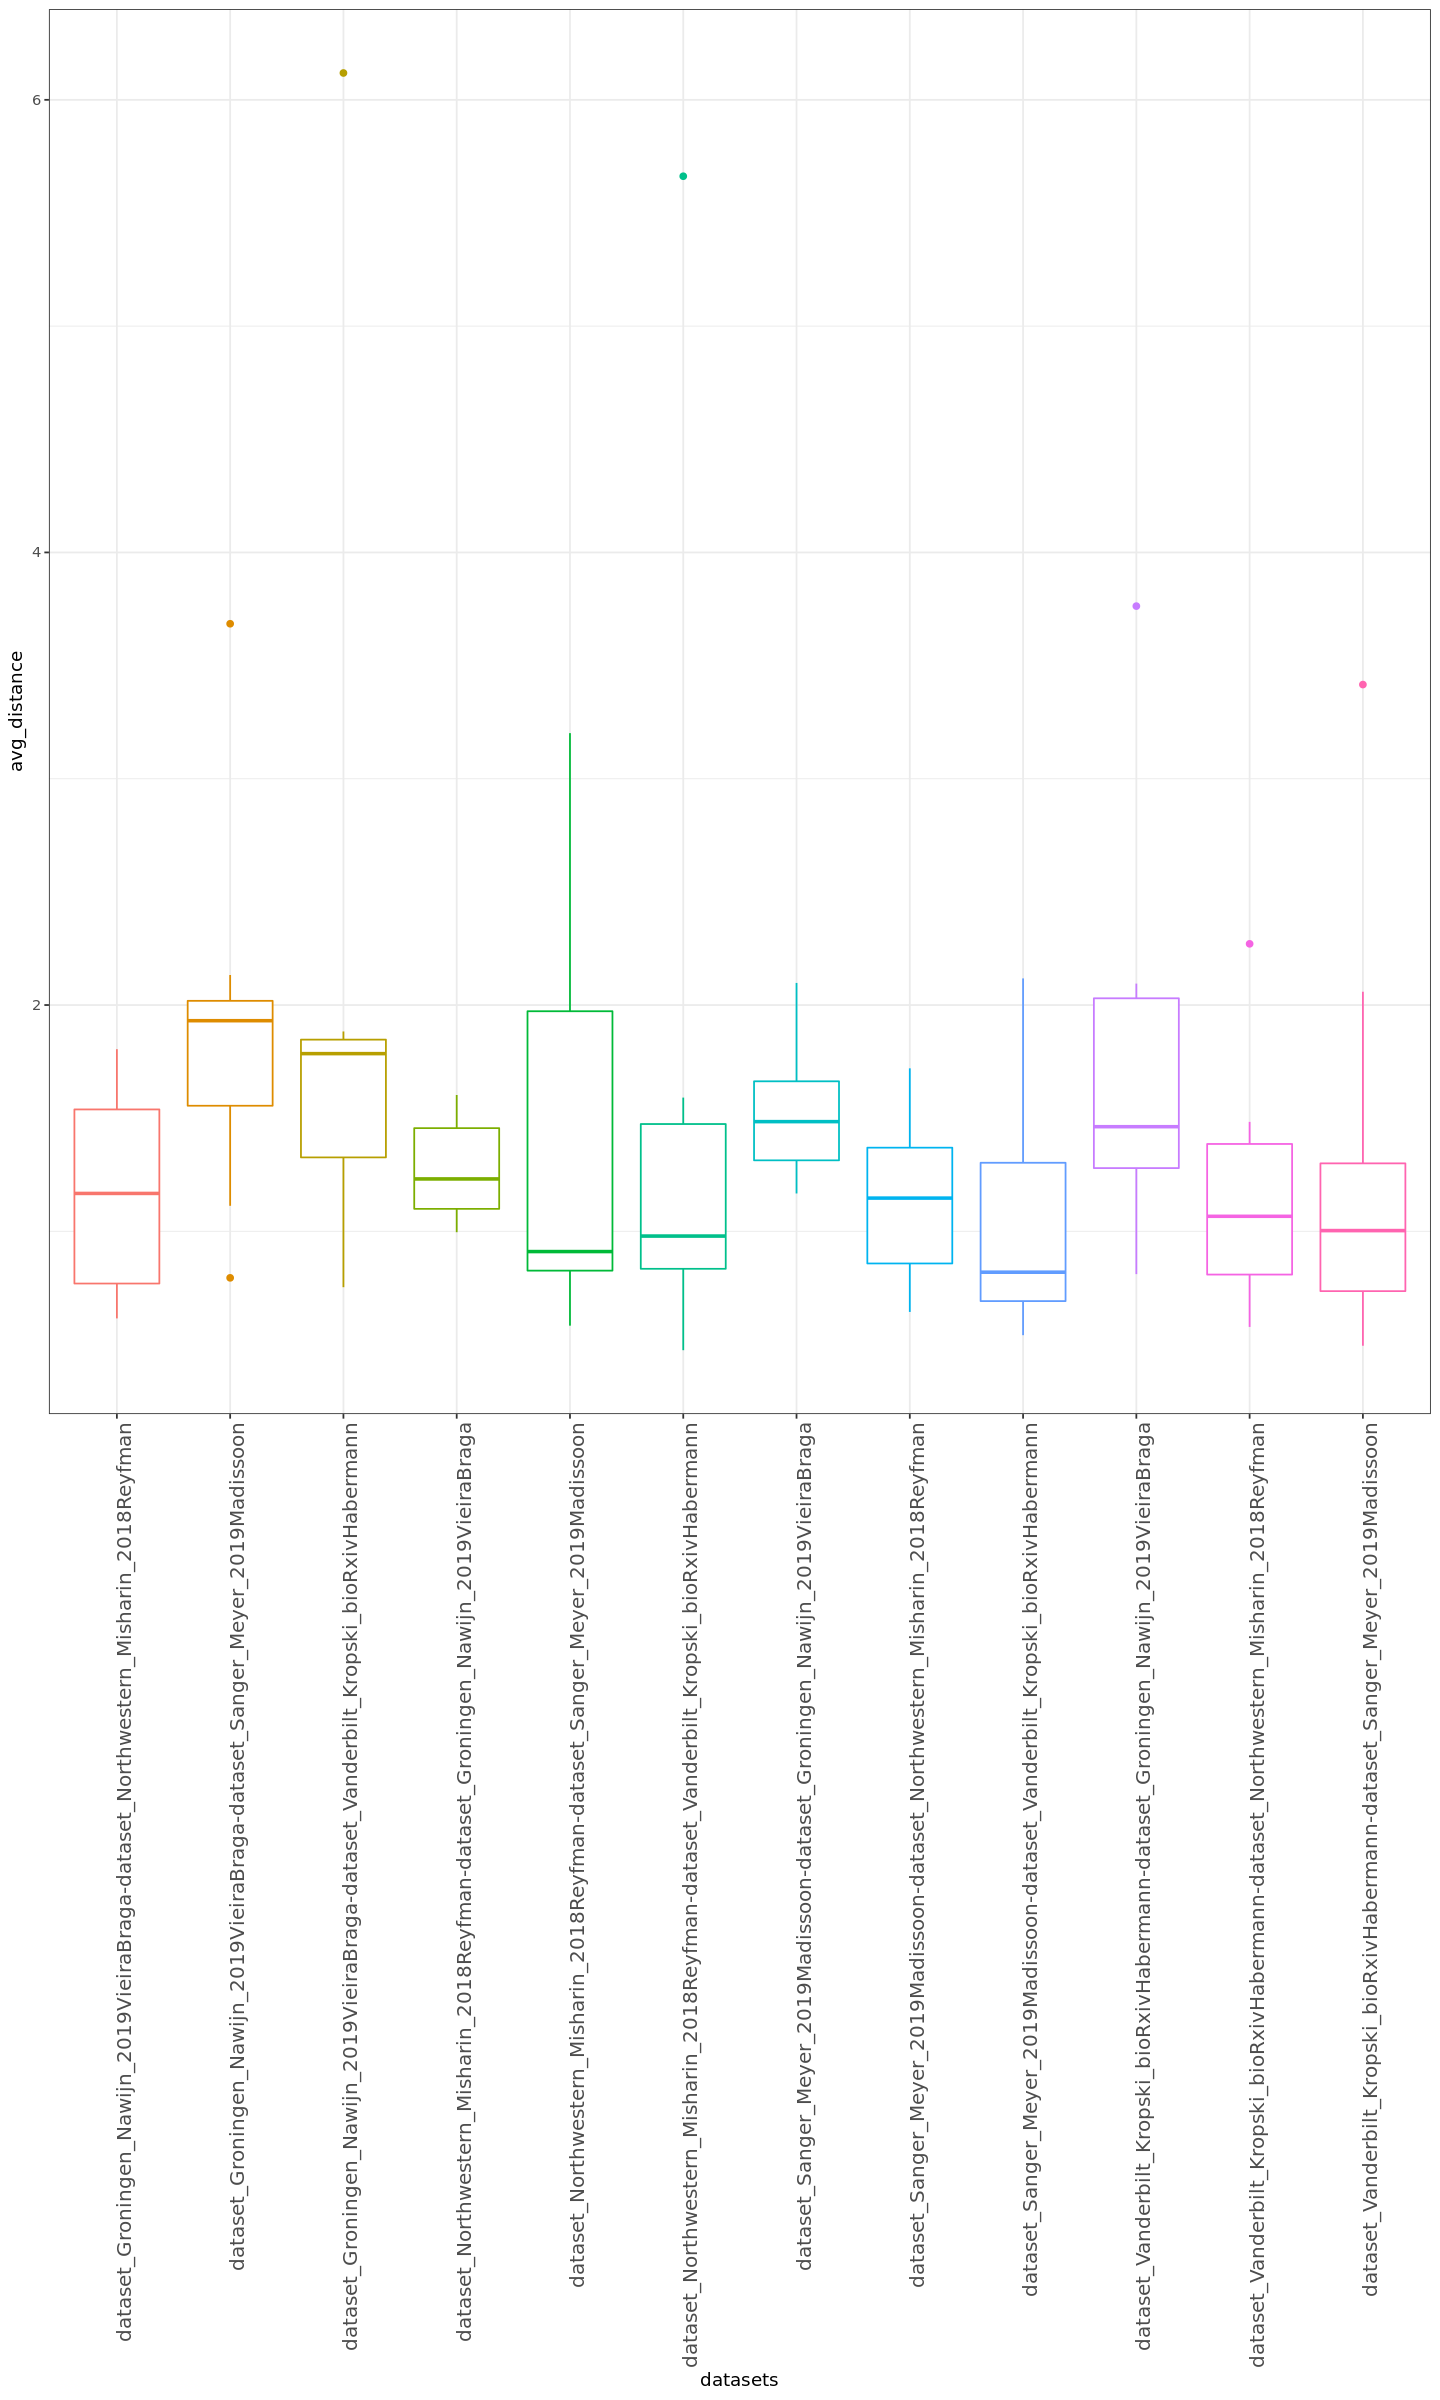

In [71]:
options(repr.plot.width = 12, repr.plot.height = 20)
dist_df$datasets = paste0(dist_df$dataset1,"-",dist_df$dataset2)
ggplot(dist_df, aes(x = datasets, y = avg_distance, colour = datasets)) + geom_boxplot() + theme_bw() +
    theme(legend.position = "none", axis.text.x = element_text(angle = 90, hjust = 1, size = 12))

[1] 116

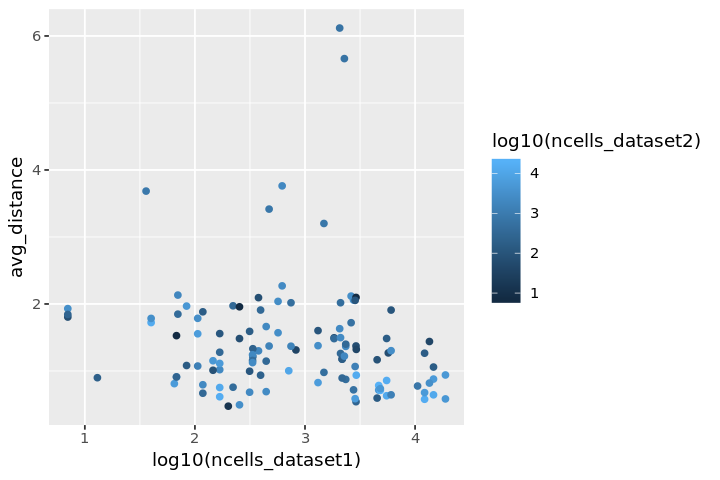

In [72]:
options(repr.plot.width = 6, repr.plot.height = 4)
nrow(dist_df)
ggplot(dist_df, aes(x = log10(ncells_dataset1), y = avg_distance, colour = log10(ncells_dataset2))) + geom_point()